# OPM Data Separation Analysis
<i><b>
Christopher Boomhower<sub>1</sub>, Stacey Fabricant<sub>2</sub>, Alex Frye<sub>1</sub>, David Mumford<sub>2</sub>, Michael Smith<sub>1</sub>, Lindsay Vitovsky<sub>1</sub>

<sub>1</sub> Southern Methodis Univeristy, Dallas, TX, US
<sub>2</sub> Penn Mutual Life Insurance Co, Horsham PA
</i></b>


### Introduction

background text...

**our intent is to: 1)..2)...3)........**

### Data Understanding

Data Source Background Text & citation links

Dataset Attribute Descriptions



### Load the Data

To begin our analysis, we need to load the data from our 89 source .txt files. Data is separated into two separate groups of files; Separation and Non-Separation, thus data is loaded in two separate phases, then unioned together. Once data is loaded, Steps taken to remove non-US observations or those with no specified occupation, no specified salary, or no specified length of service level.  Of a total 8,423,336 observations, we end with 8,232,375 after removal of these observations.

In [1]:
## Import libraries
import pickle
import os
import psutil
import glob
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import missingno as msno
import prettytable
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

## Library Options

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## Pre-defined Functions for use later
def pickleObject(objectname, filename, filepath = "PickleJar/"):
    fullpicklepath = "{0}{1}.pkl".format(filepath, filename)
    # Create a variable to pickle and open it in write mode
    picklefile = open(fullpicklepath, 'wb')
    pickle.dump(objectname, picklefile)
    picklefile.close()
    
def unpickleObject(filename, filepath = "PickleJar/"):
    fullunpicklepath = "{0}{1}.pkl".format(filepath, filename)
    # Create an variable to pickle and open it in write mode
    unpicklefile = open(fullunpicklepath, 'rb')
    unpickleObject = pickle.load(unpicklefile)
    unpicklefile.close()

    return unpickleObject
    
def clear_display():
    from IPython.display import clear_output
    
## Pre-defined variables for use later
dataOPMPath = "dataOPM"
dataEMPPath = "dataEMP"
PickleJarPath = "PickleJar"

In [3]:
%%time

## Load OPMSeparation Files

OPMDataFiles = glob.glob(os.path.join(dataOPMPath, "*.txt"))

for i in range(0,len(OPMDataFiles)):
    OPMDataFiles[i] = OPMDataFiles[i].replace("\\","/")

OPMDataList = []

for i,j in zip(OPMDataFiles,range(0,len(OPMDataFiles))):
    OPMDataList.append(pd.read_csv(i, dtype = 'str'))
    display(OPMDataList[j].head())

## Load the SEPDATA_FY2015 file into it's own object
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/SEPDATA_FY2015.txt']
OPMDataOrig = OPMDataList[indexes[0]]



AGELVL       AGELVLT
0      A  Less than 20
1      B         20-24
2      C         25-29
3      D         30-34
4      E         35-39

AGYTYP                 AGYTYPT AGY                            AGYT AGYSUB                                            AGYSUBT
0      1  Cabinet Level Agencies  AF  AF-DEPARTMENT OF THE AIR FORCE   AF**                                       AF**-INVALID
1      1  Cabinet Level Agencies  AF  AF-DEPARTMENT OF THE AIR FORCE   AF02              AF02-AIR FORCE INSPECTION AGENCY (FO)
2      1  Cabinet Level Agencies  AF  AF-DEPARTMENT OF THE AIR FORCE   AF03  AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...
3      1  Cabinet Level Agencies  AF  AF-DEPARTMENT OF THE AIR FORCE   AF06                        AF06-AIR FORCE AUDIT AGENCY
4      1  Cabinet Level Agencies  AF  AF-DEPARTMENT OF THE AIR FORCE   AF07    AF07-AIR FORCE OFFICE OF SPECIAL INVESTIGATIONS

QTR          QTRT  EFDATE   EFDATET
0   1  OCT-DEC 2014  201410  OCT 2014
1   1  OCT-DEC 2014  201411  NOV 2014
2   1  OCT-DEC 2014  201412  DEC 2014
3   2  JAN-MAR 2015  201501  JAN 2015
4   2  JAN-MAR 2015  201502  FEB 2015

GENDER      GENDERT
0      F       Female
1      M         Male
2      Z  Unspecified

GSEGRD
0     **
1     01
2     02
3     03
4     04

LOCTYP        LOCTYPT LOC           LOCT
0      1  United States  01     01-ALABAMA
1      1  United States  02      02-ALASKA
2      1  United States  04     04-ARIZONA
3      1  United States  05    05-ARKANSAS
4      1  United States  06  06-CALIFORNIA

LOSLVL           LOSLVLT
0      A  Less than 1 year
1      B       1 - 2 years
2      C       3 - 4 years
3      D       5 - 9 years
4      E     10 - 14 years

OCCTYP       OCCTYPT OCCFAM                         OCCFAMT   OCC                                            OCCT
0      1  White Collar     00  00xx-MISCELLANEOUS OCCUPATIONS  0006    0006-CORRECTIONAL INSTITUTION ADMINISTRATION
1      1  White Collar     00  00xx-MISCELLANEOUS OCCUPATIONS  0007                       0007-CORRECTIONAL OFFICER
2      1  White Collar     00  00xx-MISCELLANEOUS OCCUPATIONS  0017                          0017-EXPLOSIVES SAFETY
3      1  White Collar     00  00xx-MISCELLANEOUS OCCUPATIONS  0018  0018-SAFETY AND OCCUPATIONAL HEALTH MANAGEMENT
4      1  White Collar     00  00xx-MISCELLANEOUS OCCUPATIONS  0019                          0019-SAFETY TECHNICIAN

PATCO              PATCOT
0     1        Professional
1     2      Administrative
2     3           Technical
3     4            Clerical
4     5  Other White Collar

PPTYP                                             PPTYPT PPGROUP                 PPGROUPT PAYPLAN                                           PAYPLANT  PPGRD
0     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GL  GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...  GL-03
1     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GL  GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...  GL-04
2     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GL  GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...  GL-05
3     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GL  GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...  GL-06
4     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GL  GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...  GL-07

SALLVL            SALLVLT
0      A  Less than $20,000
1      B  $20,000 - $29,999
2      C  $30,000 - $39,999
3      D  $40,000 - $49,999
4      E  $50,000 - $59,999

SEP                                SEPT
0  SA  Transfer Out - Individual Transfer
1  SB        Transfer Out - Mass Transfer
2  SC                                Quit
3  SD              Retirement - Voluntary
4  SE              Retirement - Early Out

TOATYP    TOATYPT TOA                                         TOAT
0      1  Permanent  10              10-Competitive Service - Career
1      1  Permanent  15  15-Competitive Service - Career-Conditional
2      1  Permanent  30             30-Excepted Service - Schedule A
3      1  Permanent  32             32-Excepted Service - Schedule B
4      1  Permanent  34             34-Excepted Service - Schedule C

WSTYP         WSTYPT WORKSCH                             WORKSCHT
0     1      Full-time       B  B-Full-time Nonseasonal Baylor Plan
1     1      Full-time       F              F-Full-time Nonseasonal
2     1      Full-time       G                 G-Full-time Seasonal
3     1      Full-time       H                  H-Full-time On-call
4     2  Not Full-time       I           I-Intermittent Nonseasonal

AGYSUB SEP  EFDATE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH COUNT  SALARY   LOS
0   AA00  SC  201507      C      M     11      A  11  0905     1  GS-11      F  40       F     1  063722  00.8
1   AA00  SD  201509      K      M    NaN      D  11  0301     2  EX-02      Z  46       F     1     NaN  08.1
2   AA00  SC  201506      D      F     15      C  11  0905     1  GS-15      L  30       F     1  126245  04.8
3   AF**  SA  201503      H      M     11      C  48  2210     2  GS-11      F  10       F     1  066585  04.9
4   AF02  SD  201506      I      M     15      J  35  0301     2  GS-15      O  10       F     1  156737  39.8

CPU times: user 411 ms, sys: 42.2 ms, total: 453 ms
Wall time: 455 ms


In [4]:
%%time

#print(OPMDataFiles)

print(len(OPMDataOrig))

##### Merge / Modify Codes / Aggregate Attributes to be more descriptive per the metadata files

OPMDataMerged = OPMDataOrig.copy()

##AGYSUB - AGYTYP, AGY
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTagy.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'AGYSUB', how = 'left')

##EFDate - quarter, month
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTefdate.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'EFDATE', how = 'left')

##AGELVL - AGELVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTagelvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'AGELVL', how = 'left')

##LOSLVL - LOSLVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTloslvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'LOSLVL', how = 'left')

##LOC - LocTypeT, LocT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTloc.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'LOC', how = 'left')

##OCC - OCCTYPT, OCCFAM
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTocc.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'OCC', how = 'left')

##PATCO - PATCOT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTpatco.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'PATCO', how = 'left')

##PPGRD - PayPlan, PPGroup, PPTYP
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTppgrd.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'PPGRD', how = 'left')

##SALLVL - SALLVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTsallvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'SALLVL', how = 'left')

##TOA - TOATYP
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTtoa.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'TOA', how = 'left')

##WORKSCH - WSTYPT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTwrksch.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'WORKSCH', how = 'left')


## Modify Data Types for numeric objects
OPMDataMerged["SALARY"] = OPMDataMerged["SALARY"].apply(pd.to_numeric)
OPMDataMerged["COUNT"]  = OPMDataMerged["COUNT"].apply(pd.to_numeric)
OPMDataMerged["LOS"]    = OPMDataMerged["LOS"].apply(pd.to_numeric)

print("Original SEP data size of: "+str(len(OPMDataMerged)))
print("Removing "+str(len(OPMDataMerged[OPMDataMerged["LOCTYP"] != "1"]))+" Non-US observations.")

    ## Remove Non-US Data
OPMDataMerged = OPMDataMerged[OPMDataMerged["LOCTYP"] == "1"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["OCCTYP"] == "3"]))+" observations with no specified Occupation.")

   ## Remove Observations with no specified occupation
OPMDataMerged = OPMDataMerged[OPMDataMerged["OCCTYP"] != "3"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["SALLVL"] == "Z"]))+" observations with no specified Salary.")

   ## Remove Observations with no specified salary
OPMDataMerged = OPMDataMerged[OPMDataMerged["SALLVL"] != "Z"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["LOSLVL"] == "Z"]))+" observations with no specified Length of Service.")

   ## Remove Observations with no specified LOSLVL
OPMDataMerged = OPMDataMerged[OPMDataMerged["LOSLVL"] != "Z"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["AGELVL"] == "A"]))+" observations of Age Level A")

## Remove Observations from Age Level A (less than 20 years old)
OPMDataMerged = OPMDataMerged[OPMDataMerged["AGELVL"] != "A"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["AGELVL"] == "Z"]))+" observations with no specified Age Level.")

   ## Remove Observations with no specified Age Level
OPMDataMerged = OPMDataMerged[OPMDataMerged["AGELVL"] != "Z"]

    ## Fix differences in spaces on WORKSCHT Column
OPMDataMerged["WORKSCHT"] = np.where(OPMDataMerged["WORKSCHT"].str[0]=="F", 'Full-time Nonseasonal',
                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="I", 'Intermittent Nonseasonal',
                                         np.where(OPMDataMerged["WORKSCHT"].str[0]=="P", 'Part-time Nonseasonal',
                                                  np.where(OPMDataMerged["WORKSCHT"].str[0]=="G", 'Full-time Seasonal',
                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="J", 'Intermittent Seasonal',
                                                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="Q", 'Part-time Seasonal',
                                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="T", 'Part-time Job Sharer Seasonal',
                                                                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="S", 'Part-time Job Sharer Nonseasonal',
                                                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="B", 'Full-time Nonseasonal Baylor Plan',
                                                                                                'NO WORK SCHEDULE REPORTED' ### ELSE case represents Night
                                                                                                 )
                                                                                         )
                                                                                 )
                                                                         )
                                                                 )
                                                          )
                                                 )
                                        )
                               )    

display(OPMDataMerged.head())
print("New SEP data size of: "+str(len(OPMDataMerged)))
display(OPMDataMerged.describe().transpose())
#del OPMDataList,OPMDataFiles

226357
Original SEP data size of: 226357
Removing 8021 Non-US observations.
Removing 55 observations with no specified Occupation.
Removing 1426 observations with no specified Salary.
Removing 3 observations with no specified Length of Service.
Removing 2570 observations of Age Level A
Removing 0 observations with no specified Age Level.


AGYSUB SEP  EFDATE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY   LOS AGYTYP                                            AGYTYPT AGY                                               AGYT                                            AGYSUBT QTR          QTRT   EFDATET AGELVLT           LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                                             PPTYPT PPGROUP                 PPGROUPT PAYPLAN             PAYPLANT              SALLVLT TOATYP        TOATYPT                                         TOAT WSTYP     WSTYPT               WORKSCHT
0   AA00  SC  201507      C      M     11      A  11  0905     1  GS-11      F  40       F      1   63722.0   0.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   4  JUL-SEP 2015  JUL 2015   25-29  Less than 1 year      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      2  Non-permanent             40-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal
2   AA00  SC  201506      D      F     15      C  11  0905     1  GS-15      L  30       F      1  126245.0   4.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   3  APR-JUN 2015  JUN 2015   30-34       3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $120,000 - $129,999      1      Permanent             30-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal
3   AF**  SA  201503      H      M     11      C  48  2210     2  GS-11      F  10       F      1   66585.0   4.9      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE                                       AF**-INVALID   2  JAN-MAR 2015  MAR 2015   50-54       3 - 4 years      1  United States                 48-TEXAS      1  White Collar     22                  22xx-INFORMATION TECHNOLOGY         2210-INFORMATION TECHNOLOGY MANAGEMENT  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time Nonseasonal
4   AF02  SD  201506      I      M     15      J  35  0301     2  GS-15      O  10       F      1  156737.0  39.8      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE              AF02-AIR FORCE INSPECTION AGENCY (FO)   3  APR-JUN 2015  JUN 2015   55-59  35 years or more      1  United States            35-NEW MEXICO      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $150,000 - $159,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time Nonseasonal
5   AF03  SC  201509      H      M     13      B  06  0301     2  GS-13      I  15       F      1   92973.0   1.0      1                             Cabinet Level Agencies  AF                 

New SEP data size of: 214282


count          mean           std     min      25%      50%      75%       max
COUNT   214282.0      1.000000      0.000000     1.0      1.0      1.0      1.0       1.0
SALARY  214282.0  66479.453855  39471.623281  3913.0  35830.0  54424.0  86910.0  393699.0
LOS     214282.0     11.708865     12.631714     0.0      1.3      6.2     20.4      71.5

CPU times: user 15.5 s, sys: 152 ms, total: 15.6 s
Wall time: 15.6 s


In [5]:
%%time

if os.path.isfile(PickleJarPath+"/EMPDataOrig4Q.pkl"):
    print("Found the File! Loading Pickle Now!")
    EMPDataOrig4Q = unpickleObject("EMPDataOrig4Q")
else:
    ## Load EMPData Files

    indexes = []
    EMPDataFiles = []
    EMPDataList = []
    EMPDataOrig = []

    for i,qtr in enumerate(["Q1", "Q2", "Q3", "Q4"]): 
        EMPDataFiles.append(glob.glob(os.path.join(dataEMPPath, qtr + "/*.txt")))

        for j in range(0,len(EMPDataFiles[i])):
            EMPDataFiles[i][j] = EMPDataFiles[i][j].replace("\\","/")

        EMPDataList.append([])

        for j,file in enumerate(EMPDataFiles[i]):
            EMPDataList[i].append(pd.read_csv(file, dtype = 'str'))
            if i == 0:
                display(EMPDataList[i][j].head())

        ## Load the FactData files into it's own object
        indexes.append([])
            ##[qtr][fileindex from EMPDataList]
        indexes[i]=[j for j,x in enumerate(EMPDataFiles[i]) if dataEMPPath + '/' + qtr + '/FACTDATA' in x]   

        EMPDataOrig.append([])

        EMPDataOrig[i] = pd.concat([EMPDataList[i][indexes[i][j]] for j in range(0,len(indexes[i]))]) 
        EMPDataOrig[i]["QTR"] = str(i+1)

            ## modify data type for numerics
        EMPDataOrig[i]["SALARY"] = EMPDataOrig[i]["SALARY"].str.replace(',', '').str.replace('$', '').str.replace(' ', '').apply(pd.to_numeric)
      
        ## Load Metadata
        ##AGYSUB - AGYTYP, AGY
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTagy.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'AGYSUB', how = 'left')

        ##AGELVL - AGELVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTagelvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'AGELVL', how = 'left')

        #LOSLVL - LOSLVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTloslvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'LOSLVL', how = 'left')
        EMPDataOrig[i]["LOS"] = EMPDataOrig[i]["LOS"].apply(pd.to_numeric)
        
        ##LOC - LocTypeT, LocT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTloc.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'LOC', how = 'left')
 
        ##OCC - OCCTYPT, OCCFAM
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTocc.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'OCC', how = 'left')

        ##PATCO - PATCOT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTpatco.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'PATCO', how = 'left')

        ##PPGRD - PayPlan, PPGroup, PPTYP
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTppgrd.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'PPGRD', how = 'left')

        ##SALLVL - SALLVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTsallvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'SALLVL', how = 'left')

        ##TOA - TOATYP
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTtoa.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'TOA', how = 'left')

        ##WORKSCH - WSTYPT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTwrksch.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'WORKSCH', how = 'left')

        display(EMPDataOrig[i].head())

    EMPDataOrig4Q = pd.concat([EMPDataOrig[j] for j in range(0,len(EMPDataOrig))])
    print("Original EMP data size of: "+str(len(EMPDataOrig4Q)))
    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["LOCTYP"] != "1"]))+" Non-US observations.")
    
       ## Remove Non-US Data
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["LOCTYP"] == "1"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["OCCTYP"] == "3"]))+" observations with no specified Occupation.")

       ## Remove Observations with no specified occupation
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["OCCTYP"] != "3"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["SALLVL"] == "Z"]))+" observations with no specified Salary.")

       ## Remove Observations with no specified salary
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["SALLVL"] != "Z"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["LOSLVL"] == "Z"]))+" observations with no specified Length of Service.")

       ## Remove Observations with no specified LOSLVL
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["LOSLVL"] != "Z"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] == "A"]))+" observations of Age Level A.")

        ## Remove Observations from Age Level A (less than 20 years old)
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] != "A"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] == "Z"]))+" observations with no specified Age Level.")

        ## Remove Observations with no specified Age Level
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] != "Z"]

        ## Fix differences in spaces on WORKSCHT Column
    EMPDataOrig4Q["WORKSCHT"] = np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="F", 'Full-time Nonseasonal',
                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="I", 'Intermittent Nonseasonal',
                                             np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="P", 'Part-time Nonseasonal',
                                                      np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="G", 'Full-time Seasonal',
                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="J", 'Intermittent Seasonal',
                                                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="Q", 'Part-time Seasonal',
                                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="T", 'Part-time Job Sharer Seasonal',
                                                                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="S", 'Part-time Job Sharer Nonseasonal',
                                                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="B", 'Full-time Nonseasonal Baylor Plan',
                                                                                                    'NO WORK SCHEDULE REPORTED' ### ELSE case represents Night
                                                                                                     )
                                                                                             )
                                                                                     )
                                                                             )
                                                                     )
                                                              )
                                                     )
                                            )
                                   )    

    pickleObject(EMPDataOrig4Q, "EMPDataOrig4Q")

print("New EMP data size of: "+str(len(EMPDataOrig4Q)))

Found the File! Loading Pickle Now!
New EMP data size of: 8008911
CPU times: user 9.03 s, sys: 1.73 s, total: 10.8 s
Wall time: 10.7 s


In [6]:
display(EMPDataOrig4Q.describe().transpose())

count         mean           std      min      25%      50%      75%       max
SALARY  8008911.0  80067.37279  37918.758366  15120.0  51437.0  74130.0  99957.0  401589.0
LOS     8008911.0     13.06029     10.446755      0.0      4.9     10.0     20.1      71.1

In [7]:
%matplotlib inline

#sns.boxplot(y = "SALARY", data = EMPDataOrig4Q)

With both our separation and non-separation data loaded, we calculate three new attributes through aggregation or calculation amongst various attributes. 

1) SEP Count by Date & Occupation – total number of separations (of any type) for a given Date and Occupation; 

2) SEP Count by Date & Location – total number of separations (of any type) for a given Date and Location; 

3) Industry Average Salary – Average salary amongst non-separated employees, grouped by quarter, occupation, pay grade, and work schedule; 

We proceed, by concatenating our Separation and Non-Separation observations, and merge these newly calculated attributes to the concatenated dataset.

In [8]:
%%time
%matplotlib inline

##Aggregate Number of Total Separations in current month for given Occ
AggSEPCount_EFDATE_OCC= pd.DataFrame({'SEPCount_EFDATE_OCC' : OPMDataMerged.groupby(["EFDATE", "OCC"]).size()}).reset_index()
display(AggSEPCount_EFDATE_OCC.head())


##Aggregate Number of Total Separations in current month for given LOC
AggSEPCount_EFDATE_LOC = pd.DataFrame({'SEPCount_EFDATE_LOC' : OPMDataMerged.groupby(["EFDATE", "LOC"]).size()}).reset_index()
display(AggSEPCount_EFDATE_LOC.head())

##Average Quarterly EMP Salary by occ 
AggIndAvgSalary = pd.DataFrame({'count' : EMPDataOrig4Q.groupby(["QTR", "OCC", "PPGRD", "WORKSCHT"]).size()}).reset_index()
AggIndAvgSalary2 = pd.DataFrame({'IndSalarySum' : EMPDataOrig4Q.groupby(["QTR", "OCC", "PPGRD", "WORKSCHT"])["SALARY"].sum()}).reset_index()
AggIndAvgSalary = AggIndAvgSalary.merge(AggIndAvgSalary2,on=["QTR", "OCC", "PPGRD", "WORKSCHT"])
AggIndAvgSalary["IndAvgSalary"] = AggIndAvgSalary["IndSalarySum"]/AggIndAvgSalary["count"]
del AggIndAvgSalary["count"]
del AggIndAvgSalary["IndSalarySum"]
display(AggIndAvgSalary.head())




EFDATE   OCC  SEPCount_EFDATE_OCC
0  201410  0006                   20
1  201410  0007                   89
2  201410  0017                    1
3  201410  0018                   33
4  201410  0019                    1

EFDATE LOC  SEPCount_EFDATE_LOC
0  201410  01                  239
1  201410  02                  261
2  201410  04                  499
3  201410  05                  132
4  201410  06                 1926

QTR   OCC  PPGRD               WORKSCHT   IndAvgSalary
0   1  0006  ES-**  Full-time Nonseasonal  161827.273973
1   1  0006  GL-09  Full-time Nonseasonal   63970.126984
2   1  0006  GS-09  Full-time Nonseasonal   56876.500000
3   1  0006  GS-11  Full-time Nonseasonal   72865.783673
4   1  0006  GS-12  Full-time Nonseasonal   85742.663717

CPU times: user 2.98 s, sys: 334 ms, total: 3.31 s
Wall time: 3.31 s


In [9]:
#Merge Two Datasets
### NS SEP code means NonSeparation
###add hardcoded null value columns where applicable
EMPDataOrig4Q["SEP"] = "NS"
EMPDataOrig4Q["GENDER"] = np.nan
EMPDataOrig4Q["COUNT"] = np.nan

OPMDataMerged["DATECODE"] = OPMDataMerged["EFDATE"]

OPMColList = ["AGYSUB", "SEP", "DATECODE",   "AGELVL", "GENDER", "GSEGRD", "LOSLVL", "LOC", "OCC", "PATCO", "PPGRD", "SALLVL", "TOA", "WORKSCH", "COUNT", "SALARY", "LOS", "AGYTYP", "AGYTYPT", "AGY", "AGYT", "AGYSUBT", "QTR", "AGELVLT", "LOSLVLT", "LOCTYP", "LOCTYPT", "LOCT", "OCCTYP", "OCCTYPT", "OCCFAM", "OCCFAMT", "OCCT", "PATCOT", "PPTYP", "PPTYPT", "PPGROUP", "PPGROUPT", "PAYPLAN", "PAYPLANT", "SALLVLT", "TOATYP", "TOATYPT", "TOAT", "WSTYP", "WSTYPT", "WORKSCHT"]
EMPColList = ["AGYSUB", "SEP", "DATECODE", "AGELVL", "GENDER", "GSEGRD", "LOSLVL", "LOC", "OCC", "PATCO", "PPGRD", "SALLVL", "TOA", "WORKSCH", "COUNT", "SALARY", "LOS", "AGYTYP", "AGYTYPT", "AGY", "AGYT", "AGYSUBT", "QTR", "AGELVLT", "LOSLVLT", "LOCTYP", "LOCTYPT", "LOCT", "OCCTYP", "OCCTYPT", "OCCFAM", "OCCFAMT", "OCCT", "PATCOT", "PPTYP", "PPTYPT", "PPGROUP", "PPGROUPT", "PAYPLAN", "PAYPLANT", "SALLVLT", "TOATYP", "TOATYPT", "TOAT", "WSTYP", "WSTYPT", "WORKSCHT"]

OPMDataMerged = pd.concat([OPMDataMerged[OPMColList], EMPDataOrig4Q[EMPColList]], ignore_index=True)
print("Total concatenated data size for SEP and non-SEP: "+str(len(OPMDataMerged)))

OPMDataMerged = OPMDataMerged.merge(AggSEPCount_EFDATE_OCC, left_on = ['DATECODE','OCC'], right_on = ['EFDATE','OCC'], how = 'left')
OPMDataMerged = OPMDataMerged.merge(AggSEPCount_EFDATE_LOC, left_on = ['DATECODE','LOC'], right_on = ['EFDATE','LOC'], how = 'left')
OPMDataMerged = OPMDataMerged.merge(AggIndAvgSalary, on = ['QTR','OCC', 'PPGRD', 'WORKSCHT'], how = 'left')
OPMDataMerged["SalaryOverUnderIndAvg"] = OPMDataMerged["SALARY"] - OPMDataMerged["IndAvgSalary"]

del OPMDataMerged["EFDATE_x"]
del OPMDataMerged["EFDATE_y"]

display(OPMDataMerged.head())
display(OPMDataMerged.tail())

Total concatenated data size for SEP and non-SEP: 8223193


AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY   LOS AGYTYP                                            AGYTYPT AGY                                               AGYT                                            AGYSUBT QTR AGELVLT           LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                                             PPTYPT PPGROUP                 PPGROUPT PAYPLAN             PAYPLANT              SALLVLT TOATYP        TOATYPT                                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg
0   AA00  SC   201507      C      M     11      A  11  0905     1  GS-11      F  40       F    1.0   63722.0   0.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   4   25-29  Less than 1 year      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      2  Non-permanent             40-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                205.0                 1319   64540.593830            -818.593830
1   AA00  SC   201506      D      F     15      C  11  0905     1  GS-15      L  30       F    1.0  126245.0   4.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   3   30-34       3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $120,000 - $129,999      1      Permanent             30-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                207.0                 1132  149864.298504          -23619.298504
2   AF**  SA   201503      H      M     11      C  48  2210     2  GS-11      F  10       F    1.0   66585.0   4.9      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE                                       AF**-INVALID   2   50-54       3 - 4 years      1  United States                 48-TEXAS      1  White Collar     22                  22xx-INFORMATION TECHNOLOGY         2210-INFORMATION TECHNOLOGY MANAGEMENT  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time Nonseasonal                439.0                 1087   71530.963755           -4945.963755
3   AF02  SD   201506      I      M     15      J  35  0301     2  GS-15      O  10       F    1.0  156737.0  39.8      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE              AF02-AIR FORCE INSPECTION AGENCY (FO)   3   55-59  35 years or more      1  United States            35-NEW MEXICO      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $150,000 - $159,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time

AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY  LOS AGYTYP                                            AGYTYPT AGY                                         AGYT                                        AGYSUBT QTR     AGELVLT      LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                        PPTYPT PPGROUP                              PPGROUPT PAYPLAN                                           PAYPLANT              SALLVLT TOATYP        TOATYPT                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg
8223188   ZU00  NS   201509      D    NaN    NaN      C  11  0301     2  AD-00      G  48       F    NaN   76377.0  4.8      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4       30-34  3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...    $70,000 - $79,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250          -39463.182250
8223189   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      M  48       F    NaN  139517.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $130,000 - $139,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           23676.817750
8223190   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      O  48       F    NaN  158671.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $150,000 - $159,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           42830.817750
8223191   ZU00  NS   201509      B    NaN    NaN      B  11  0301     2  AD-00      C  48       F    NaN   36244.0  1.6      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4       20-24  1 - 2 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...    $30,000 - $39,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonse

In [10]:

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()]))

display(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()][["SEP","DATECODE", "OCC"]].drop_duplicates())


50993


SEP DATECODE   OCC
217479   NS   201412  7402
217582   NS   201412  7420
217603   NS   201412  1051
217663   NS   201412  1054
218685   NS   201412  2504
218871   NS   201412  8201
218999   NS   201412  4104
219003   NS   201412  4715
219135   NS   201412  0698
220085   NS   201412  0019
220426   NS   201412  3602
221497   NS   201412  2608
221637   NS   201412  3725
224242   NS   201412  6968
225410   NS   201412  0392
226132   NS   201412  3606
228440   NS   201412  2601
231003   NS   201412  3940
231189   NS   201412  5439
246316   NS   201412  1725
246379   NS   201412  5317
246874   NS   201412  5737
247551   NS   201412  1386
254687   NS   201412  0394
259606   NS   201412  4819
264047   NS   201412  2144
266228   NS   201412  1056
268830   NS   201412  5736
270371   NS   201412  0021
271810   NS   201412  3872
271986   NS   201412  4301
273244   NS   201412  3701
273326   NS   201412  6656
273665   NS   201412  8601
275118   NS   201412  3858
275185   NS   201412  4745
277206   NS   201412  4816
279195   NS   201412  1699
284633   NS   201412  5423
289472   NS   201412  1321
295232   NS   201412  3727
305466   NS   201412  1521
319867   NS   201412  0642
325062   NS   201412  4373
332634   NS   201412  2110
349140   NS   201412  0134
376747   NS   201412  0435
377161   NS   201412  1382
380400   NS   201412  0440
380444   NS   201412  0890
380485   NS   201412  1221
380534   NS   201412  0799
380549   NS   201412  0471
381610   NS   201412  5002
381660   NS   201412  0302
382823   NS   201412  4737
383757   NS   201412  1384
387315   NS   201412  3511
395468   NS   201412  1380
407172   NS   201412  0880
417564   NS   201412  1202
422349   NS   201412  0184
431266   NS   201412  5729
444970   NS   201412  3515
455591   NS   201412  4414
456269   NS   201412  1850
457198   NS   201412  0160
461672   NS   201412  0136
475474   NS   201412  1374
475784   NS   201412  6517
475903   NS   201412  6605
480003   NS   201412  5310
485323   NS   201412  3605
500481   NS   201412  4741
503007   NS   201412  1397
505340   NS   201412  3314
506488   NS   201412  5323
516998   NS   201412  4101
519478   NS   201412  0322
558933   NS   201412  4010
559676   NS   201412  0648
593579   NS   201412  3301
596650   NS   201412  3101
625941   NS   201412  7603
661444   NS   201412  4807
661550   NS   201412  3428
662101   NS   201412  5738
676144   NS   201412  5205
685955   NS   201412  6505
686300   NS   201412  3546
686445   NS   201412  5427
704369   NS   201412  2161
709277   NS   201412  9927
709522   NS   201412  9968
711524   NS   201412  9944
711608   NS   201412  9916
711636   NS   201412  9957
712047   NS   201412  9960
712126   NS   201412  9971
722081   NS   201412  1226
722670   NS   201412  1223
725221   NS   201412  1299
766570   NS   201412  1999
859013   NS   201412  1541
966674   NS   201412  0106
966676   NS   201412  0243
966716   NS   201412  0140
971520   NS   201412  0357
1087460  NS   201412  1046
1145227  NS   201412  4717
1345880  NS   201412  2501
1359410  NS   201412  3910
1363515  NS   201412  9961
1384266  NS   201412  9905
1389961  NS   201412  5419
1502113  NS   201412  3604
1503521  NS   201412  3808
1528597  NS   201412  1021
1534692  NS   201412  9942
1534710  NS   201412  9997
1534741  NS   201412  9975
1534742  NS   201412  9930
1534756  NS   201412  9945
1534808  NS   201412  9972
1534811  NS   201412  9995
1534822  NS   201412  9940
1534917  NS   201412  9993
1534931  NS   201412  9982
1535050  NS   201412  9999
1535060  NS   201412  9915
1535179  NS   201412  9955
1535640  NS   201412  9919
1535643  NS   201412  9918
1536227  NS   201412  9914
1537487  NS   201412  9921
1538507  NS   201412  9903
1562285  NS   201412  5221
1620441  NS   201412  1831
1846895  NS   201412  5440
1846946  NS   201412  3513
1848770  NS   201412  4406
1848778  NS   201412  4454
1872827  NS   201412  0593
1906935  NS   201412  0625
1937597  NS   201412  0637
2209093  NS   201503  1054
2209135  NS   201503  0050
2209165  NS 

These 50993 Non-Separation observations do not have coverage within the Separation Dataset, thus, we will remove these observations as out of scope demographic in our analysis. Any attempt in predicting these values will not have enough data to support a significant response. 

In [11]:
OPMDataMerged = OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].notnull()]

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()]))

print(len(OPMDataMerged))

0
8172200


In [12]:

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_LOC"].isnull()]))

display(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_LOC"].isnull()][["SEP","DATECODE","LOC"]].drop_duplicates())


0


Empty DataFrame
Columns: [SEP, DATECODE, LOC]
Index: []

In [13]:

print(len(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()]))

display(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()][["QTR", "SEP","OCCT", "PPGRD", "WORKSCHT"]].drop_duplicates())


1293


QTR SEP                                               OCCT  PPGRD                          WORKSCHT
257      4  SC             7401-MISC FOOD PREPARATION AND SERVING  WG-01             Full-time Nonseasonal
627      4  SC                      1301-GENERAL PHYSICAL SCIENCE  AD-24             Part-time Nonseasonal
697      4  SJ                0199-SOCIAL SCIENCE STUDENT TRAINEE  GS-02          Intermittent Nonseasonal
749      4  SC              3940-BROADCASTING EQUIPMENT OPERATING  WG-10             Full-time Nonseasonal
2401     4  SJ  0399-ADMINISTRATION AND OFFICE SUPPORT STUDENT...  GS-02             Intermittent Seasonal
3412     2  SC                                     5003-GARDENING  WG-04                Full-time Seasonal
3471     1  SA                                     5003-GARDENING  WG-04                Full-time Seasonal
3551     3  SD               5716-ENGINEERING EQUIPMENT OPERATING  WS-14             Full-time Nonseasonal
4937     3  SC                     0819-ENVIRONMENTAL ENGINEERING  GS-11  Part-time Job Sharer Nonseasonal
5285     1  SD               5716-ENGINEERING EQUIPMENT OPERATING  WG-08             Intermittent Seasonal
5363     4  SJ                  0189-RECREATION AID AND ASSISTANT  GS-03          Intermittent Nonseasonal
5763     1  SD                2005-SUPPLY CLERICAL AND TECHNICIAN  GS-04  Part-time Job Sharer Nonseasonal
6079     3  SC                                    0180-PSYCHOLOGY  NH-02             Full-time Nonseasonal
6957     3  SD                             0810-CIVIL ENGINEERING  DR-03             Full-time Nonseasonal
7015     1  SA                                1306-HEALTH PHYSICS  DR-01             Full-time Nonseasonal
7376     4  SC  1699-EQUIPMENT AND FACILITIES MANAGEMENT STUDE...  GS-05             Full-time Nonseasonal
7395     3  SC          0599-FINANCIAL MANAGEMENT STUDENT TRAINEE  DU-01             Full-time Nonseasonal
7464     3  SD                3769-SHOT PEENING MACHINE OPERATING  WS-07             Full-time Nonseasonal
7512     4  SC                           0840-NUCLEAR ENGINEERING  DR-03             Full-time Nonseasonal
7675     2  SD                                  4714-MODEL MAKING  WL-15             Full-time Nonseasonal
7727     4  SC                  0189-RECREATION AID AND ASSISTANT  GS-02                Part-time Seasonal
7877     4  SJ                  0189-RECREATION AID AND ASSISTANT  GS-02                Part-time Seasonal
8054     4  SC                0665-SPEECH PATHOLOGY AND AUDIOLOGY  DR-03             Full-time Nonseasonal
8160     4  SC                                      4102-PAINTING  WG-05                Part-time Seasonal
8216     2  SA                               5725-CRANE OPERATING  WG-08             Full-time Nonseasonal
8320     4  SD           5401-MISC INDUSTRIAL EQUIPMENT OPERATION  WS-11             Full-time Nonseasonal
8325     1  SC                  0189-RECREATION AID AND ASSISTANT  DU-01             Part-time Nonseasonal
8389     4  SD                       3705-NON-DESTRUCTIVE TESTING  WS-16             Full-time Nonseasonal
8435     4  SD                   1330-ASTRONOMY AND SPACE SCIENCE  DR-04             Full-time Nonseasonal
8449     1  SK                                      4102-PAINTING  WG-05                Part-time Seasonal
9741     4  SC                  0189-RECREATION AID AND ASSISTANT  GS-03                Part-time Seasonal
9890     1  SI               8801-MISCELLANEOUS AIRCRAFT OVERHAUL  WG-08             Part-time Nonseasonal
9903     1  SD                                         0610-NURSE  DR-01             Full-time Nonseasonal
9916     2  SD                               0130-FOREIGN AFFAIRS  DO-02             Full-time Nonseasonal
10139    4  SC           6901-MISC WAREHOUSING AND STOCK HANDLING  WG-06  Part-time Job Sharer Nonseasonal
10656    2  SC       5309-HEATING & BOILER PLANT EQUIPMT MECHANIC  WL-11             Full-time Nonseasonal
11491    4  SC                               100

These 1293 separation observations do not have coverage within the EMP Dataset, thus, we will remove these observations as out of scope demographic in our analysis. Any attempt in predicting these values will not have enough data to support a significant response. 

In [14]:
OPMDataMerged = OPMDataMerged[OPMDataMerged["IndAvgSalary"].notnull()]

print(len(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()]))

print(len(OPMDataMerged))

0
8170907


*************************************
*************************************

# Placeholder Chunks for Data Quality check of salary against GS Grade Level Ranges

*************************************
*************************************

In [15]:
# Placeholder Chunks for Data Quality check of salary against GS Grade Level Ranges

We are iterested to see how federal pension plans may impact attrition in this dataset. An interesting attribute to complement Length of service, is Years to Retirement. Utilizing a FERS retirement eligibility baseline of 57 years of age for all observations, and the lower limitation of age level ranges we compute a numeric value for length of retirement.

In [16]:
#Add Column YearsToRetirement

"""
    AGELVL,AGELVLT
    A,Less than 20
    B,20-24
    C,25-29
    D,30-34
    E,35-39
    F,40-44
    G,45-49
    H,50-54
    I,55-59
    J,60-64
    K,65 or more
    Z,Unspecified
"""
OPMDataMerged["LowerLimitAge"] = np.where(OPMDataMerged["AGELVL"]=="B", 20,
                                                np.where(OPMDataMerged["AGELVL"]=="C", 25,
                                                         np.where(OPMDataMerged["AGELVL"]=="D", 30,
                                                                  np.where(OPMDataMerged["AGELVL"]=="E", 35,
                                                                           np.where(OPMDataMerged["AGELVL"]=="F", 40,
                                                                                    np.where(OPMDataMerged["AGELVL"]=="G", 45,
                                                                                             np.where(OPMDataMerged["AGELVL"]=="H", 50,
                                                                                                      np.where(OPMDataMerged["AGELVL"]=="I", 55,
                                                                                                               np.where(OPMDataMerged["AGELVL"]=="J", 60,
                                                                                                                        np.where(OPMDataMerged["AGELVL"]=="K", 65,
                                                                                                                                 np.nan
                                                                                                                                )
                                                                                                                        )
                                                                                                               )
                                                                                                      )
                                                                                            )
                                                                                   )
                                                                          )
                                                                 )
                                                        )
                                               )  

retAge = 57

OPMDataMerged["YearsToRetirement"] = np.where(OPMDataMerged["AGELVL"]=="B", retAge-20,
                                                np.where(OPMDataMerged["AGELVL"]=="C", retAge-25,
                                                         np.where(OPMDataMerged["AGELVL"]=="D", retAge-30,
                                                                  np.where(OPMDataMerged["AGELVL"]=="E", retAge-35,
                                                                           np.where(OPMDataMerged["AGELVL"]=="F", retAge-40,
                                                                                    np.where(OPMDataMerged["AGELVL"]=="G", retAge-45,
                                                                                             np.where(OPMDataMerged["AGELVL"]=="H", retAge-50,
                                                                                                      np.where(OPMDataMerged["AGELVL"]=="I", retAge-55,
                                                                                                               np.where(OPMDataMerged["AGELVL"]=="J", retAge-60,
                                                                                                                        np.where(OPMDataMerged["AGELVL"]=="K", retAge-65,
                                                                                                                                 np.nan
                                                                                                                                )
                                                                                                                        )
                                                                                                               )
                                                                                                      )
                                                                                            )
                                                                                   )
                                                                          )
                                                                 )
                                                        )
                                               )  

print("Null Values for LowerLimitAge: " + str(len(OPMDataMerged[OPMDataMerged["LowerLimitAge"].isnull()])))
print("Null Values for YearsToRetirement: " + str(len(OPMDataMerged[OPMDataMerged["YearsToRetirement"].isnull()])))

display(OPMDataMerged.head())
display(OPMDataMerged.tail())


Null Values for LowerLimitAge: 0
Null Values for YearsToRetirement: 0


AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY   LOS AGYTYP                                            AGYTYPT AGY                                               AGYT                                            AGYSUBT QTR AGELVLT           LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                                             PPTYPT PPGROUP                 PPGROUPT PAYPLAN             PAYPLANT              SALLVLT TOATYP        TOATYPT                                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement
0   AA00  SC   201507      C      M     11      A  11  0905     1  GS-11      F  40       F    1.0   63722.0   0.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   4   25-29  Less than 1 year      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      2  Non-permanent             40-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                205.0                 1319   64540.593830            -818.593830           25.0               32.0
1   AA00  SC   201506      D      F     15      C  11  0905     1  GS-15      L  30       F    1.0  126245.0   4.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   3   30-34       3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $120,000 - $129,999      1      Permanent             30-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                207.0                 1132  149864.298504          -23619.298504           30.0               27.0
2   AF**  SA   201503      H      M     11      C  48  2210     2  GS-11      F  10       F    1.0   66585.0   4.9      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE                                       AF**-INVALID   2   50-54       3 - 4 years      1  United States                 48-TEXAS      1  White Collar     22                  22xx-INFORMATION TECHNOLOGY         2210-INFORMATION TECHNOLOGY MANAGEMENT  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time Nonseasonal                439.0                 1087   71530.963755           -4945.963755           50.0                7.0
3   AF02  SD   201506      I      M     15      J  35  0301     2  GS-15      O  10       F    1.0  156737.0  39.8      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE              AF02-AIR FORCE INSPECTION AGENCY (FO)   3   55-59  35 years or more      1  United States            35-NEW MEXICO      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS 

AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY  LOS AGYTYP                                            AGYTYPT AGY                                         AGYT                                        AGYSUBT QTR     AGELVLT      LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                        PPTYPT PPGROUP                              PPGROUPT PAYPLAN                                           PAYPLANT              SALLVLT TOATYP        TOATYPT                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement
8223188   ZU00  NS   201509      D    NaN    NaN      C  11  0301     2  AD-00      G  48       F    NaN   76377.0  4.8      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4       30-34  3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...    $70,000 - $79,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250          -39463.182250           30.0               27.0
8223189   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      M  48       F    NaN  139517.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $130,000 - $139,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           23676.817750           65.0               -8.0
8223190   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      O  48       F    NaN  158671.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $150,000 - $159,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           42830.817750           65.0               -8.0
8223191   ZU00  NS   201509      B    NaN    NaN      B  11  0301     2  AD-00      C  48       F    NaN   36244.0  1.6      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4       20-24  1 - 2 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY

### Pull Bureau of Labor Statistics data

In addition to the OPM data, we merge 10 attributes from the Bureau of Labor Statistics (BLS). Data is sourced from Federal Government industry codes across all regions. Although assumed to be highly correlated, we source both Level (Total number) and Rate (Percentage of Level to total employment and / or job openings) for the following statistics: 1) Job Openings, 2) Layoffs, 3) Quits, 4) Total Separations, and 5) Other Separations. While Rate paints an aggregated, holistic picture for job market trends, Level provides a raw count for total separations alone. Both these statistics were captured by a monthly aggregate and merged to the OPM data by their respective months.

In [17]:
%%time

def bls(series, start, end):
    headers = {'Content-type': 'application/json'}
    sID   = []
    
    for i in range(0,len(series)):
        sID.append(series[i][0])
    
    data = json.dumps({"seriesid": sID,
                       "startyear":start,
                       "endyear":end,
                       "catalog":False,
                       "calculations":False,
                       "annualaverage":False,
                       "registrationkey":"7a89c8d7979349fba8914b8be16a1646"})
    
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    bls = []
    for series in json_data['Results']['series']:
        #x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
        result = pd.DataFrame(columns=["series id","year","period","value","footnotes"])
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes=""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                #x.add_row([seriesId,year,period,value,footnotes[0:-1]])
                y = pd.DataFrame({"series id" : seriesId,
                                  "year" : year,
                                  "period" : period,
                                  "value" : value,
                                  "footnotes" : footnotes}, index = [0])
                result = result.append(y, ignore_index = True)
        bls.append(result)
    return(bls)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


In [18]:
%%time

seriesList = [
              ['JTU91000000JOL','BLS_FEDERAL_JobOpenings_Level'],
              ['JTU91000000LDL','BLS_FEDERAL_Layoffs_Level'],
              ['JTU91000000OSL','BLS_FEDERAL_OtherSep_Level'],
              ['JTU91000000QUL','BLS_FEDERAL_Quits_Level'],
              ['JTU91000000TSL','BLS_FEDERAL_TotalSep_Level'],
              ['JTU91000000JOR','BLS_FEDERAL_JobOpenings_Rate'],
              ['JTU91000000LDR','BLS_FEDERAL_Layoffs_Rate'],
              ['JTU91000000OSR','BLS_FEDERAL_OtherSep_Rate'],
              ['JTU91000000QUR','BLS_FEDERAL_Quits_Rate'],
              ['JTU91000000TSR','BLS_FEDERAL_TotalSep_Rate']
             ]

# Pull job openings and labor turnover data
JTL = bls(seriesList, "2014", "2015")

seriesList = pd.DataFrame(seriesList, columns = ["series id","sName"])

##We need to replace these with actual Descriptor Column Names

for i in range(0,len(seriesList)):
    
    JTL[i] = JTL[i].merge(seriesList, on = "series id", how = 'inner')

    if len(JTL[i]) >0:
        name = JTL[i]["sName"].drop_duplicates().values[0]
    else:
        name = str(i)

    JTL[i][name] = JTL[i]["value"].apply(pd.to_numeric)
    JTL[i]["DATECODE"] = JTL[i]["year"] + JTL[i]["period"].str[-2:]
    del JTL[i]["value"]
    del JTL[i]["year"]
    del JTL[i]["period"]
    del JTL[i]["series id"]
    del JTL[i]["footnotes"]
    del JTL[i]["sName"]
    
    
    OPMDataMerged = OPMDataMerged.merge(JTL[i], on = "DATECODE", how = 'left')
    display(JTL[i].head())
    

BLS_FEDERAL_OtherSep_Rate DATECODE
0                        0.4   201512
1                        0.4   201511
2                        0.4   201510
3                        0.4   201509
4                        0.5   201508

BLS_FEDERAL_Quits_Rate DATECODE
0                     0.4   201512
1                     0.4   201511
2                     0.6   201510
3                     0.5   201509
4                     0.6   201508

BLS_FEDERAL_TotalSep_Level DATECODE
0                          37   201512
1                          35   201511
2                          45   201510
3                          38   201509
4                          41   201508

BLS_FEDERAL_JobOpenings_Rate DATECODE
0                           2.9   201512
1                           2.6   201511
2                           2.4   201510
3                           1.9   201509
4                           2.3   201508

BLS_FEDERAL_OtherSep_Level DATECODE
0                          12   201512
1                          10   201511
2                          12   201510
3                          12   201509
4                          14   201508

BLS_FEDERAL_Quits_Level DATECODE
0                       11   201512
1                       10   201511
2                       16   201510
3                       14   201509
4                       17   201508

BLS_FEDERAL_JobOpenings_Level DATECODE
0                             83   201512
1                             73   201511
2                             68   201510
3                             55   201509
4                             67   201508

BLS_FEDERAL_Layoffs_Rate DATECODE
0                       0.5   201512
1                       0.6   201511
2                       0.6   201510
3                       0.4   201509
4                       0.3   201508

BLS_FEDERAL_Layoffs_Level DATECODE
0                         15   201512
1                         15   201511
2                         18   201510
3                         12   201509
4                         10   201508

BLS_FEDERAL_TotalSep_Rate DATECODE
0                        1.3   201512
1                        1.3   201511
2                        1.6   201510
3                        1.4   201509
4                        1.5   201508

CPU times: user 36.1 s, sys: 9.68 s, total: 45.7 s
Wall time: 46.3 s


In [19]:
display(OPMDataMerged.head())
display(OPMDataMerged.tail())

AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY   LOS AGYTYP                                            AGYTYPT AGY                                               AGYT                                            AGYSUBT QTR AGELVLT           LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                                             PPTYPT PPGROUP                 PPGROUPT PAYPLAN             PAYPLANT              SALLVLT TOATYP        TOATYPT                                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement  BLS_FEDERAL_OtherSep_Rate  BLS_FEDERAL_Quits_Rate  BLS_FEDERAL_TotalSep_Level  BLS_FEDERAL_JobOpenings_Rate  BLS_FEDERAL_OtherSep_Level  \
0   AA00  SC   201507      C      M     11      A  11  0905     1  GS-11      F  40       F    1.0   63722.0   0.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   4   25-29  Less than 1 year      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      2  Non-permanent             40-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                205.0                 1319   64540.593830            -818.593830           25.0               32.0                        0.4                     0.5                          34                           2.6                          11   
1   AA00  SC   201506      D      F     15      C  11  0905     1  GS-15      L  30       F    1.0  126245.0   4.8      4  Small Independent Agencies (less than 100 empl...  AA  AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES  AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...   3   30-34       3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     09                       09xx-LEGAL AND KINDRED                          0905-GENERAL ATTORNEY    Professional     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE  $120,000 - $129,999      1      Permanent             30-Excepted Service - Schedule A     1  Full-time  Full-time Nonseasonal                207.0                 1132  149864.298504          -23619.298504           30.0               27.0                        0.4                     0.5                          34                           2.3                          12   
2   AF**  SA   201503      H      M     11      C  48  2210     2  GS-11      F  10       F    1.0   66585.0   4.9      1                             Cabinet Level Agencies  AF                     AF-DEPARTMENT OF THE AIR FORCE                                       AF**-INVALID   2   50-54       3 - 4 years      1  United States                 48-TEXAS      1  White Collar     22                  22xx-INFORMATION TECHNOLOGY         2210-INFORMATION TECHNOLOGY MANAGEMENT  Administrative     1  General Schedule and Equivalently Graded (GSEG...      11  Standard GSEG Pay Plans      GS  GS-GENERAL SCHEDULE    $60,000 - $69,999      1      Permanent              10-Competitive Service - Career     1  Full-time  Full-time Nonseasonal                439.0                 1087   71530.963755           -4945.963755           50.0                7.0                        0.3                     0.4                          31                           3.0                           9   
3   AF02  SD   201506      I  

AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT    SALARY  LOS AGYTYP                                            AGYTYPT AGY                                         AGYT                                        AGYSUBT QTR     AGELVLT      LOSLVLT LOCTYP        LOCTYPT                     LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                           OCCT          PATCOT PPTYP                        PPTYPT PPGROUP                              PPGROUPT PAYPLAN                                           PAYPLANT              SALLVLT TOATYP        TOATYPT                         TOAT WSTYP     WSTYPT               WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC   IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement  BLS_FEDERAL_OtherSep_Rate  BLS_FEDERAL_Quits_Rate  BLS_FEDERAL_TotalSep_Level  BLS_FEDERAL_JobOpenings_Rate  BLS_FEDERAL_OtherSep_Level  \
8170902   ZU00  NS   201509      D    NaN    NaN      C  11  0301     2  AD-00      G  48       F    NaN   76377.0  4.8      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4       30-34  3 - 4 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...    $70,000 - $79,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250          -39463.182250           30.0               27.0                        0.4                     0.5                          38                           1.9                          12   
8170903   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      M  48       F    NaN  139517.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $130,000 - $139,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           23676.817750           65.0               -8.0                        0.4                     0.5                          38                           1.9                          12   
8170904   ZU00  NS   201509      K    NaN    NaN      D  11  0301     2  AD-00      O  48       F    NaN  158671.0  7.0      4  Small Independent Agencies (less than 100 empl...  ZU  ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION  ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION   4  65 or more  5 - 9 years      1  United States  11-DISTRICT OF COLUMBIA      1  White Collar     03  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM  Administrative     3  Other White Collar Pay Plans      31  Governmentwide or Multi-Agency Plans      AD  AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...  $150,000 - $159,999      2  Non-permanent  48-Excepted Service - Other     1  Full-time  Full-time Nonseasonal                721.0                 1391  115840.182250           42830.817750           65.0               -8.0                        0.4                     0.5                          38                           1.9                          12   
8170905   ZU00  NS   201509      B  

In [20]:
display(pd.DataFrame({'StratCount' : OPMDataMerged.groupby(["SEP"]).size()}).reset_index())

SEP  StratCount
0   NS     7957918
1   SA       26945
2   SB         333
3   SC       66248
4   SD       56820
5   SE        1260
6   SF        4100
7   SG        1467
8   SH         400
9   SI        9728
10  SJ       42754
11  SK        2892
12  SL          42

There are several separation types we would like to either roll up, or remove altogether.

**Roll-Up**

We have chosen to roll up all retirement separation together. Separation categories of 1) SD,Retirement - Voluntary; 2)  SE,Retirement - Early Out; 3) SF,Retirement - Disability; 4) SG,Retirement - Other are consolidated into one category "SD".

**Removal**

We have chosen to remove the following. 1) SB,Transfer Out - Mass Transfer; 2) SK,Death; 3) SL,Other Separation.


In [21]:
OPMDataMerged = OPMDataMerged[(OPMDataMerged["SEP"] != "SB") & (OPMDataMerged["SEP"] != "SK") & (OPMDataMerged["SEP"] != "SL")]

OPMDataMerged.loc[(OPMDataMerged["SEP"] == "SD") | (OPMDataMerged["SEP"] == "SE") | (OPMDataMerged["SEP"] == "SF") | (OPMDataMerged["SEP"] == "SG"), "SEP"]="SD"


In [22]:
stratum = pd.DataFrame({'StratCount' : OPMDataMerged.groupby(["SEP"]).size()}).reset_index()

stratum.loc[stratum["StratCount"]>50000,"StratCountSample"] = 50000
stratum.loc[stratum["StratCount"]<=50000,"StratCountSample"] = stratum["StratCount"]
#else: stratum["StratCountSample"] = stratum["StratCount"]

display(stratum)

SEP  StratCount  StratCountSample
0  NS     7957918           50000.0
1  SA       26945           26945.0
2  SC       66248           50000.0
3  SD       63647           50000.0
4  SH         400             400.0
5  SI        9728            9728.0
6  SJ       42754           42754.0

In [23]:
%%time

MaxSampleSize = 50000

AggStrat = []

for i in range(0,len(stratum)):
    sep = stratum["SEP"].ix[i]
    StratCountSample = stratum["StratCountSample"].ix[i]
    print("Stratum Sample Size Calculations for SEP: {}".format(sep))   
    AggStrat.append(pd.DataFrame({'StratCount' : OPMDataMerged[OPMDataMerged["SEP"]==sep].groupby(["DATECODE", "AGELVL"]).size()}).reset_index())
    AggStrat[i]["SEP"] = sep
    AggStrat[i]["TotalCount"] = len(OPMDataMerged[OPMDataMerged["SEP"]==sep])
    AggStrat[i]["p"] = AggStrat[i]["StratCount"] / AggStrat[i]["TotalCount"]
    AggStrat[i]["StratCountSample"] = StratCountSample
    AggStrat[i]["StratSampleSize"] = round(AggStrat[i]["p"] * StratCountSample).apply(int)
    
    display(AggStrat[i].head())
    print("totalStratumSampleSize: ", AggStrat[i]["StratSampleSize"].sum())
    #print(len(AggStrat[i]))


Stratum Sample Size Calculations for SEP: NS


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201412      B       29620  NS     7957918  0.003722           50000.0              186
1   201412      C      121071  NS     7957918  0.015214           50000.0              761
2   201412      D      211123  NS     7957918  0.026530           50000.0             1326
3   201412      E      213971  NS     7957918  0.026888           50000.0             1344
4   201412      F      230736  NS     7957918  0.028995           50000.0             1450

totalStratumSampleSize:  49996
Stratum Sample Size Calculations for SEP: SA


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201410      B          24  SA       26945  0.000891           26945.0               24
1   201410      C         238  SA       26945  0.008833           26945.0              238
2   201410      D         432  SA       26945  0.016033           26945.0              432
3   201410      E         308  SA       26945  0.011431           26945.0              308
4   201410      F         309  SA       26945  0.011468           26945.0              309

totalStratumSampleSize:  26945
Stratum Sample Size Calculations for SEP: SC


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201410      B         345  SC       66248  0.005208           50000.0              260
1   201410      C         829  SC       66248  0.012514           50000.0              626
2   201410      D         977  SC       66248  0.014748           50000.0              737
3   201410      E         774  SC       66248  0.011683           50000.0              584
4   201410      F         578  SC       66248  0.008725           50000.0              436

totalStratumSampleSize:  50000
Stratum Sample Size Calculations for SEP: SD


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201410      C           5  SD       63647  0.000079           50000.0                4
1   201410      D           9  SD       63647  0.000141           50000.0                7
2   201410      E          22  SD       63647  0.000346           50000.0               17
3   201410      F          45  SD       63647  0.000707           50000.0               35
4   201410      G          86  SD       63647  0.001351           50000.0               68

totalStratumSampleSize:  50002
Stratum Sample Size Calculations for SEP: SH


DATECODE AGELVL  StratCount SEP  TotalCount       p  StratCountSample  StratSampleSize
0   201410      C           1  SH         400  0.0025             400.0                1
1   201410      D           2  SH         400  0.0050             400.0                2
2   201410      H           1  SH         400  0.0025             400.0                1
3   201410      I           4  SH         400  0.0100             400.0                4
4   201411      C           2  SH         400  0.0050             400.0                2

totalStratumSampleSize:  400
Stratum Sample Size Calculations for SEP: SI


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201410      B          56  SI        9728  0.005757            9728.0               56
1   201410      C         110  SI        9728  0.011308            9728.0              110
2   201410      D         106  SI        9728  0.010896            9728.0              106
3   201410      E          98  SI        9728  0.010074            9728.0               98
4   201410      F         102  SI        9728  0.010485            9728.0              102

totalStratumSampleSize:  9728
Stratum Sample Size Calculations for SEP: SJ


DATECODE AGELVL  StratCount SEP  TotalCount         p  StratCountSample  StratSampleSize
0   201410      B        1189  SJ       42754  0.027810           42754.0             1189
1   201410      C        1699  SJ       42754  0.039739           42754.0             1699
2   201410      D         958  SJ       42754  0.022407           42754.0              958
3   201410      E         480  SJ       42754  0.011227           42754.0              480
4   201410      F         316  SJ       42754  0.007391           42754.0              316

totalStratumSampleSize:  42754
CPU times: user 14 s, sys: 1.6 s, total: 15.6 s
Wall time: 15.5 s


Using a seed value equal to each strata sample size, we take random samples according to the computed sizes above. We loop through each Separation Type's Aggregated Strata Sample Sizes; Identify all observations matching on Datecode, Separation Type, and AgeLevel; and finally sample those observations with the computed sample size.

In [24]:
%%time
if os.path.isfile(PickleJarPath+"/SampledOPMData.pkl"):
    print("Found the File! Loading Pickle Now!")
    SampledOPMData = unpickleObject("SampledOPMData")
else:
    SampledOPMStratumDataList = []

    for i,StratSampleSize in enumerate(AggStrat):
        SampledOPMStratumData = []
        for j in range(0,len(StratSampleSize)):
            SEP = StratSampleSize["SEP"].ix[j]
            DATECODE = StratSampleSize["DATECODE"].ix[j]
            AGELVL = StratSampleSize["AGELVL"].ix[j]
            SampleSize = StratSampleSize["StratSampleSize"].ix[j]
            print(SEP, DATECODE, AGELVL, SampleSize)
            
            SampledOPMStratumDataList.append(OPMDataMerged[(OPMDataMerged["SEP"]==SEP) 
                                                    & (OPMDataMerged["DATECODE"]==DATECODE) 
                                                    & (OPMDataMerged["AGELVL"]==AGELVL)].sample(SampleSize,  random_state=SampleSize))
        SampledOPMStratumData.append(pd.concat(SampledOPMStratumDataList))
        clear_display()
    SampledOPMData = pd.concat(SampledOPMStratumData).reset_index()
    del SampledOPMData["index"]
    pickleObject(SampledOPMData, "SampledOPMData")
    clear_display()

Found the File! Loading Pickle Now!
CPU times: user 391 ms, sys: 73.7 ms, total: 464 ms
Wall time: 468 ms


In [25]:
print(len(SampledOPMData))
display(SampledOPMData.head())


229825


AGYSUB SEP DATECODE AGELVL GENDER GSEGRD LOSLVL LOC   OCC PATCO  PPGRD SALLVL TOA WORKSCH  COUNT   SALARY  LOS AGYTYP                 AGYTYPT AGY                                AGYT                                            AGYSUBT QTR AGELVLT           LOSLVLT LOCTYP        LOCTYPT                                  LOCT OCCTYP       OCCTYPT OCCFAM                                      OCCFAMT                                    OCCT       PATCOT PPTYP                                             PPTYPT PPGROUP                       PPGROUPT PAYPLAN                                           PAYPLANT            SALLVLT TOATYP        TOATYPT                              TOAT WSTYP         WSTYPT                  WORKSCHT  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC  IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement  BLS_FEDERAL_OtherSep_Rate  BLS_FEDERAL_Quits_Rate  BLS_FEDERAL_TotalSep_Level  BLS_FEDERAL_JobOpenings_Rate  BLS_FEDERAL_OtherSep_Level  \
0   AG34  NS   201412      B    NaN     04      B  39  0404     3  GS-04      B  40       I    NaN  29012.0  1.3      1  Cabinet Level Agencies  AG        AG-DEPARTMENT OF AGRICULTURE    AG34-ANIMAL AND PLANT HEALTH INSPECTION SERVICE   1   20-24       1 - 2 years      1  United States                               39-OHIO      1  White Collar     04  04xx-NATURAL RESOURCES MGMT & BIO SCI GROUP      0404-BIOLOGICAL SCIENCE TECHNICIAN    Technical     1  General Schedule and Equivalently Graded (GSEG...      11        Standard GSEG Pay Plans      GS                                GS-GENERAL SCHEDULE  $20,000 - $29,999      2  Non-permanent  40-Excepted Service - Schedule A     2  Not Full-time  Intermittent Nonseasonal                210.0                  435  28613.506494             398.493506           20.0               37.0                        0.5                     0.4                          30                           2.2                          12   
1   ARX7  NS   201412      B    NaN    NaN      D  01  2604     6  WG-08      D  10       F    NaN  42366.0  6.3      1  Cabinet Level Agencies  AR           AR-DEPARTMENT OF THE ARMY  ARX7-U.S. ARMY TANK-AUTOMOTIVE AND ARMAMENT CO...   1   20-24       5 - 9 years      1  United States                            01-ALABAMA      2   Blue Collar     26  26xx-ELECTRONIC EQUIP. INSTALLTN & MAINTNCE               2604-ELECTRONICS MECHANIC  Blue Collar     2            Prevailing Rate Pay Plans (Blue Collar)      21  Federal Wage System Pay Plans      WG  WG-NONSUPERVISORY PAY SCHEDULES - FEDERAL WAGE...  $40,000 - $49,999      1      Permanent   10-Competitive Service - Career     1      Full-time     Full-time Nonseasonal                 51.0                  316  47119.208333           -4753.208333           20.0               37.0                        0.5                     0.4                          30                           2.2                          12   
2   VATA  NS   201412      B    NaN    NaN      A  12  3566     6  WG-02      B  38       F    NaN  22748.0  0.4      1  Cabinet Level Agencies  VA   VA-DEPARTMENT OF VETERANS AFFAIRS                VATA-VETERANS HEALTH ADMINISTRATION   1   20-24  Less than 1 year      1  United States                            12-FLORIDA      2   Blue Collar     35       35xx-GENERAL SERVICES AND SUPPORT WORK                  3566-CUSTODIAL WORKING  Blue Collar     2            Prevailing Rate Pay Plans (Blue Collar)      21  Federal Wage System Pay Plans      WG  WG-NONSUPERVISORY PAY SCHEDULES - FEDERAL WAGE...  $20,000 - $29,999      1      Permanent       38-Excepted Service - Other     1      Full-time     Full-time Nonseasonal                159.0                  769  30717.985350           -7969.985350           20.0               37.0                        0.5                     0.4                          30                           2.2                          12   
3   HSBC  NS   201412      B    NaN    NaN      B  US  1802     3   SV-E      

In [26]:
%%time

display(pd.DataFrame({'StratCount' : SampledOPMData.groupby(["SEP"]).size()}).reset_index())

SEP  StratCount
0  NS       49996
1  SA       26945
2  SC       50000
3  SD       50002
4  SH         400
5  SI        9728
6  SJ       42754

CPU times: user 24.1 ms, sys: 1.01 ms, total: 25.1 ms
Wall time: 24 ms


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


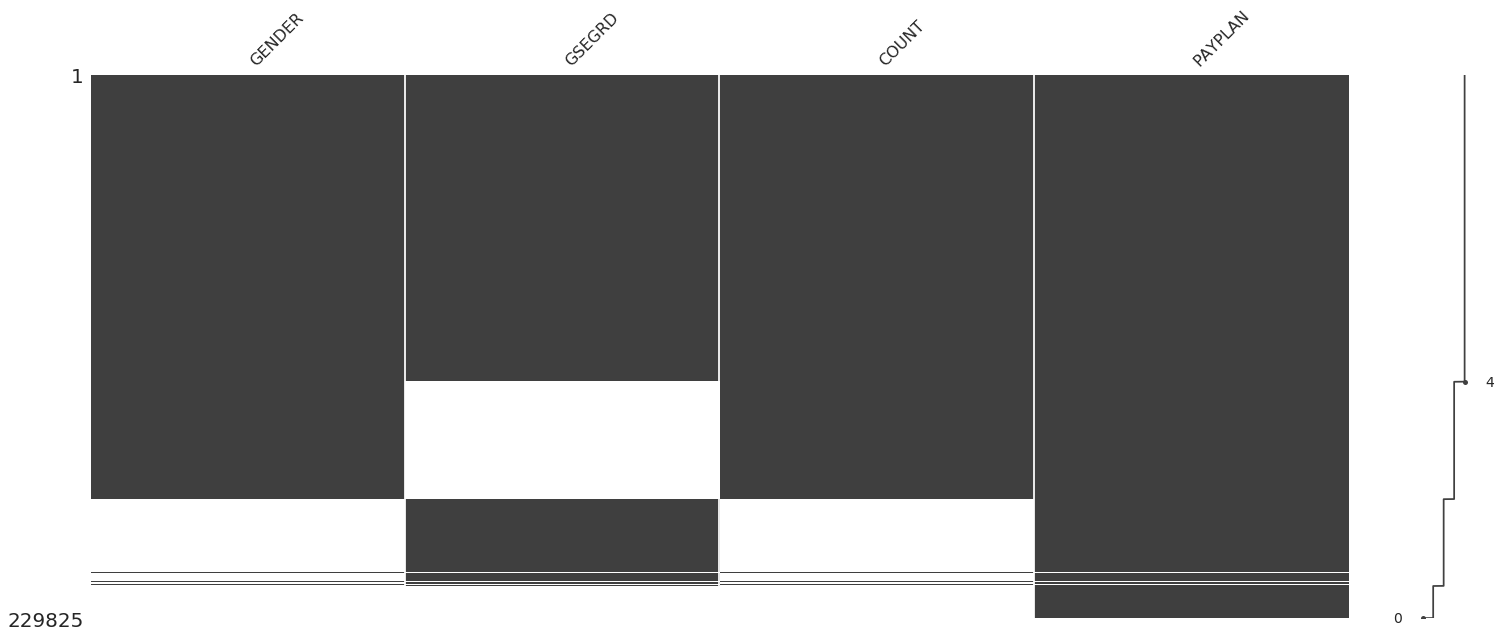

CPU times: user 1.94 s, sys: 4.75 s, total: 6.7 s
Wall time: 1.22 s


In [27]:
%%time

#### Analyze Missing Values
filtered_msnoData = msno.nullity_sort(msno.nullity_filter(SampledOPMData, filter='bottom', n=15, p=0.999), sort='descending')
msno.matrix(filtered_msnoData)

del filtered_msnoData

In [28]:
%%time

display(SampledOPMData.describe().transpose())

count          mean           std            min           25%           50%           75%            max
COUNT                          179829.0      1.000000      0.000000       1.000000      1.000000      1.000000      1.000000       1.000000
SALARY                         229825.0  68484.593421  39222.641133    3913.000000  38192.000000  57893.000000  90258.000000  393699.000000
LOS                            229825.0     11.590089     12.031473       0.000000      1.700000      6.700000     19.000000      71.500000
SEPCount_EFDATE_OCC            229825.0    322.823548    499.635080       1.000000     49.000000    139.000000    417.000000    2718.000000
SEPCount_EFDATE_LOC            229825.0    686.191833    525.737809      18.000000    264.000000    533.000000   1085.000000    2791.000000
IndAvgSalary                   229825.0  68572.422328  37521.220799   17196.500000  39570.000000  57470.509288  85878.565378  261155.558824
SalaryOverUnderIndAvg          229825.0    -87.828907  10378.466006 -133647.983893  -4191.319278   -600.948387   3808.069644  196420.857998
LowerLimitAge                  229825.0     43.740172     14.080989      20.000000     30.000000     45.000000     55.000000      65.000000
YearsToRetirement              229825.0     13.259828     14.080989      -8.000000      2.000000     12.000000     27.000000      37.000000
BLS_FEDERAL_OtherSep_Rate      229825.0      0.426391      0.079997       0.300000      0.400000      0.400000      0.500000       0.600000
BLS_FEDERAL_Quits_Rate         229825.0      0.454055      0.072026       0.300000      0.400000      0.500000      0.500000       0.600000
BLS_FEDERAL_TotalSep_Level     229825.0     35.927688      7.800401      26.000000     31.000000     34.000000     38.000000      60.000000
BLS_FEDERAL_JobOpenings_Rate   229825.0      2.418116      0.394127       1.900000      2.100000      2.300000      2.800000       3.200000
BLS_FEDERAL_OtherSep_Level     229825.0     11.850495      2.259852       8.000000     10.000000     12.000000     12.000000      17.000000
BLS_FEDERAL_Quits_Level        229825.0     12.041014      2.135340       9.000000     10.000000     13.000000     13.000000      17.000000
BLS_FEDERAL_JobOpenings_Level  229825.0     68.781978     11.488117      55.000000     58.000000     65.000000     80.000000      91.000000
BLS_FEDERAL_Layoffs_Rate       229825.0      0.447247      0.196386       0.300000      0.400000      0.400000      0.500000       1.100000
BLS_FEDERAL_Layoffs_Level      229825.0     12.107347      5.389367       7.000000     10.000000     12.000000     12.000000      30.000000
BLS_FEDERAL_TotalSep_Rate      229825.0      1.301169      0.290099       1.000000      1.100000      1.200000      1.400000       2.200000

CPU times: user 190 ms, sys: 59.4 ms, total: 249 ms
Wall time: 187 ms


In [29]:
#%%time

#OPMDataMerged.to_csv("OPMDataMerged.csv")

In [30]:
#os.path.getsize("OPMDataMerged.csv") #Display file size in bytes

## Preliminary EDA

In terms of data exploration, we first investigate numeric type attributes. Relationships, distributions, and correlation values are reviewed.

In [31]:
%%time


cols = list(SampledOPMData.select_dtypes(include=['float64', 'int64']))
cols.remove('COUNT')
cols.append('SEP')

plotNumeric = SampledOPMData[cols].dropna()
display(plotNumeric.head())
print("plotNumeric Has {0} Records".format(len(plotNumeric)))

SALARY  LOS  SEPCount_EFDATE_OCC  SEPCount_EFDATE_LOC  IndAvgSalary  SalaryOverUnderIndAvg  LowerLimitAge  YearsToRetirement  BLS_FEDERAL_OtherSep_Rate  BLS_FEDERAL_Quits_Rate  BLS_FEDERAL_TotalSep_Level  BLS_FEDERAL_JobOpenings_Rate  BLS_FEDERAL_OtherSep_Level  BLS_FEDERAL_Quits_Level  BLS_FEDERAL_JobOpenings_Level  BLS_FEDERAL_Layoffs_Rate  BLS_FEDERAL_Layoffs_Level  BLS_FEDERAL_TotalSep_Rate SEP
0  29012.0  1.3                210.0                  435  28613.506494             398.493506           20.0               37.0                        0.5                     0.4                          30                           2.2                          12                       10                             62                       0.3                          7                        1.1  NS
1  42366.0  6.3                 51.0                  316  47119.208333           -4753.208333           20.0               37.0                        0.5                     0.4                          30                           2.2                          12                       10                             62                       0.3                          7                        1.1  NS
2  22748.0  0.4                159.0                  769  30717.985350           -7969.985350           20.0               37.0                        0.5                     0.4                          30                           2.2                          12                       10                             62                       0.3                          7                        1.1  NS
3  38875.0  1.8                536.0                  213  37898.274510             976.725490           20.0               37.0                        0.5                     0.4                          30                           2.2                          12                       10                             62                       0.3                          7                        1.1  NS
4  32656.0  0.2                536.0                  213  32786.947109            -130.947109           20.0               37.0                        0.5                     0.4                          30                           2.2                          12                       10                             62                       0.3                          7                        1.1  NS

plotNumeric Has 229825 Records
CPU times: user 114 ms, sys: 2.88 ms, total: 116 ms
Wall time: 115 ms


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


CPU times: user 7min 15s, sys: 5min 31s, total: 12min 47s
Wall time: 6min 10s


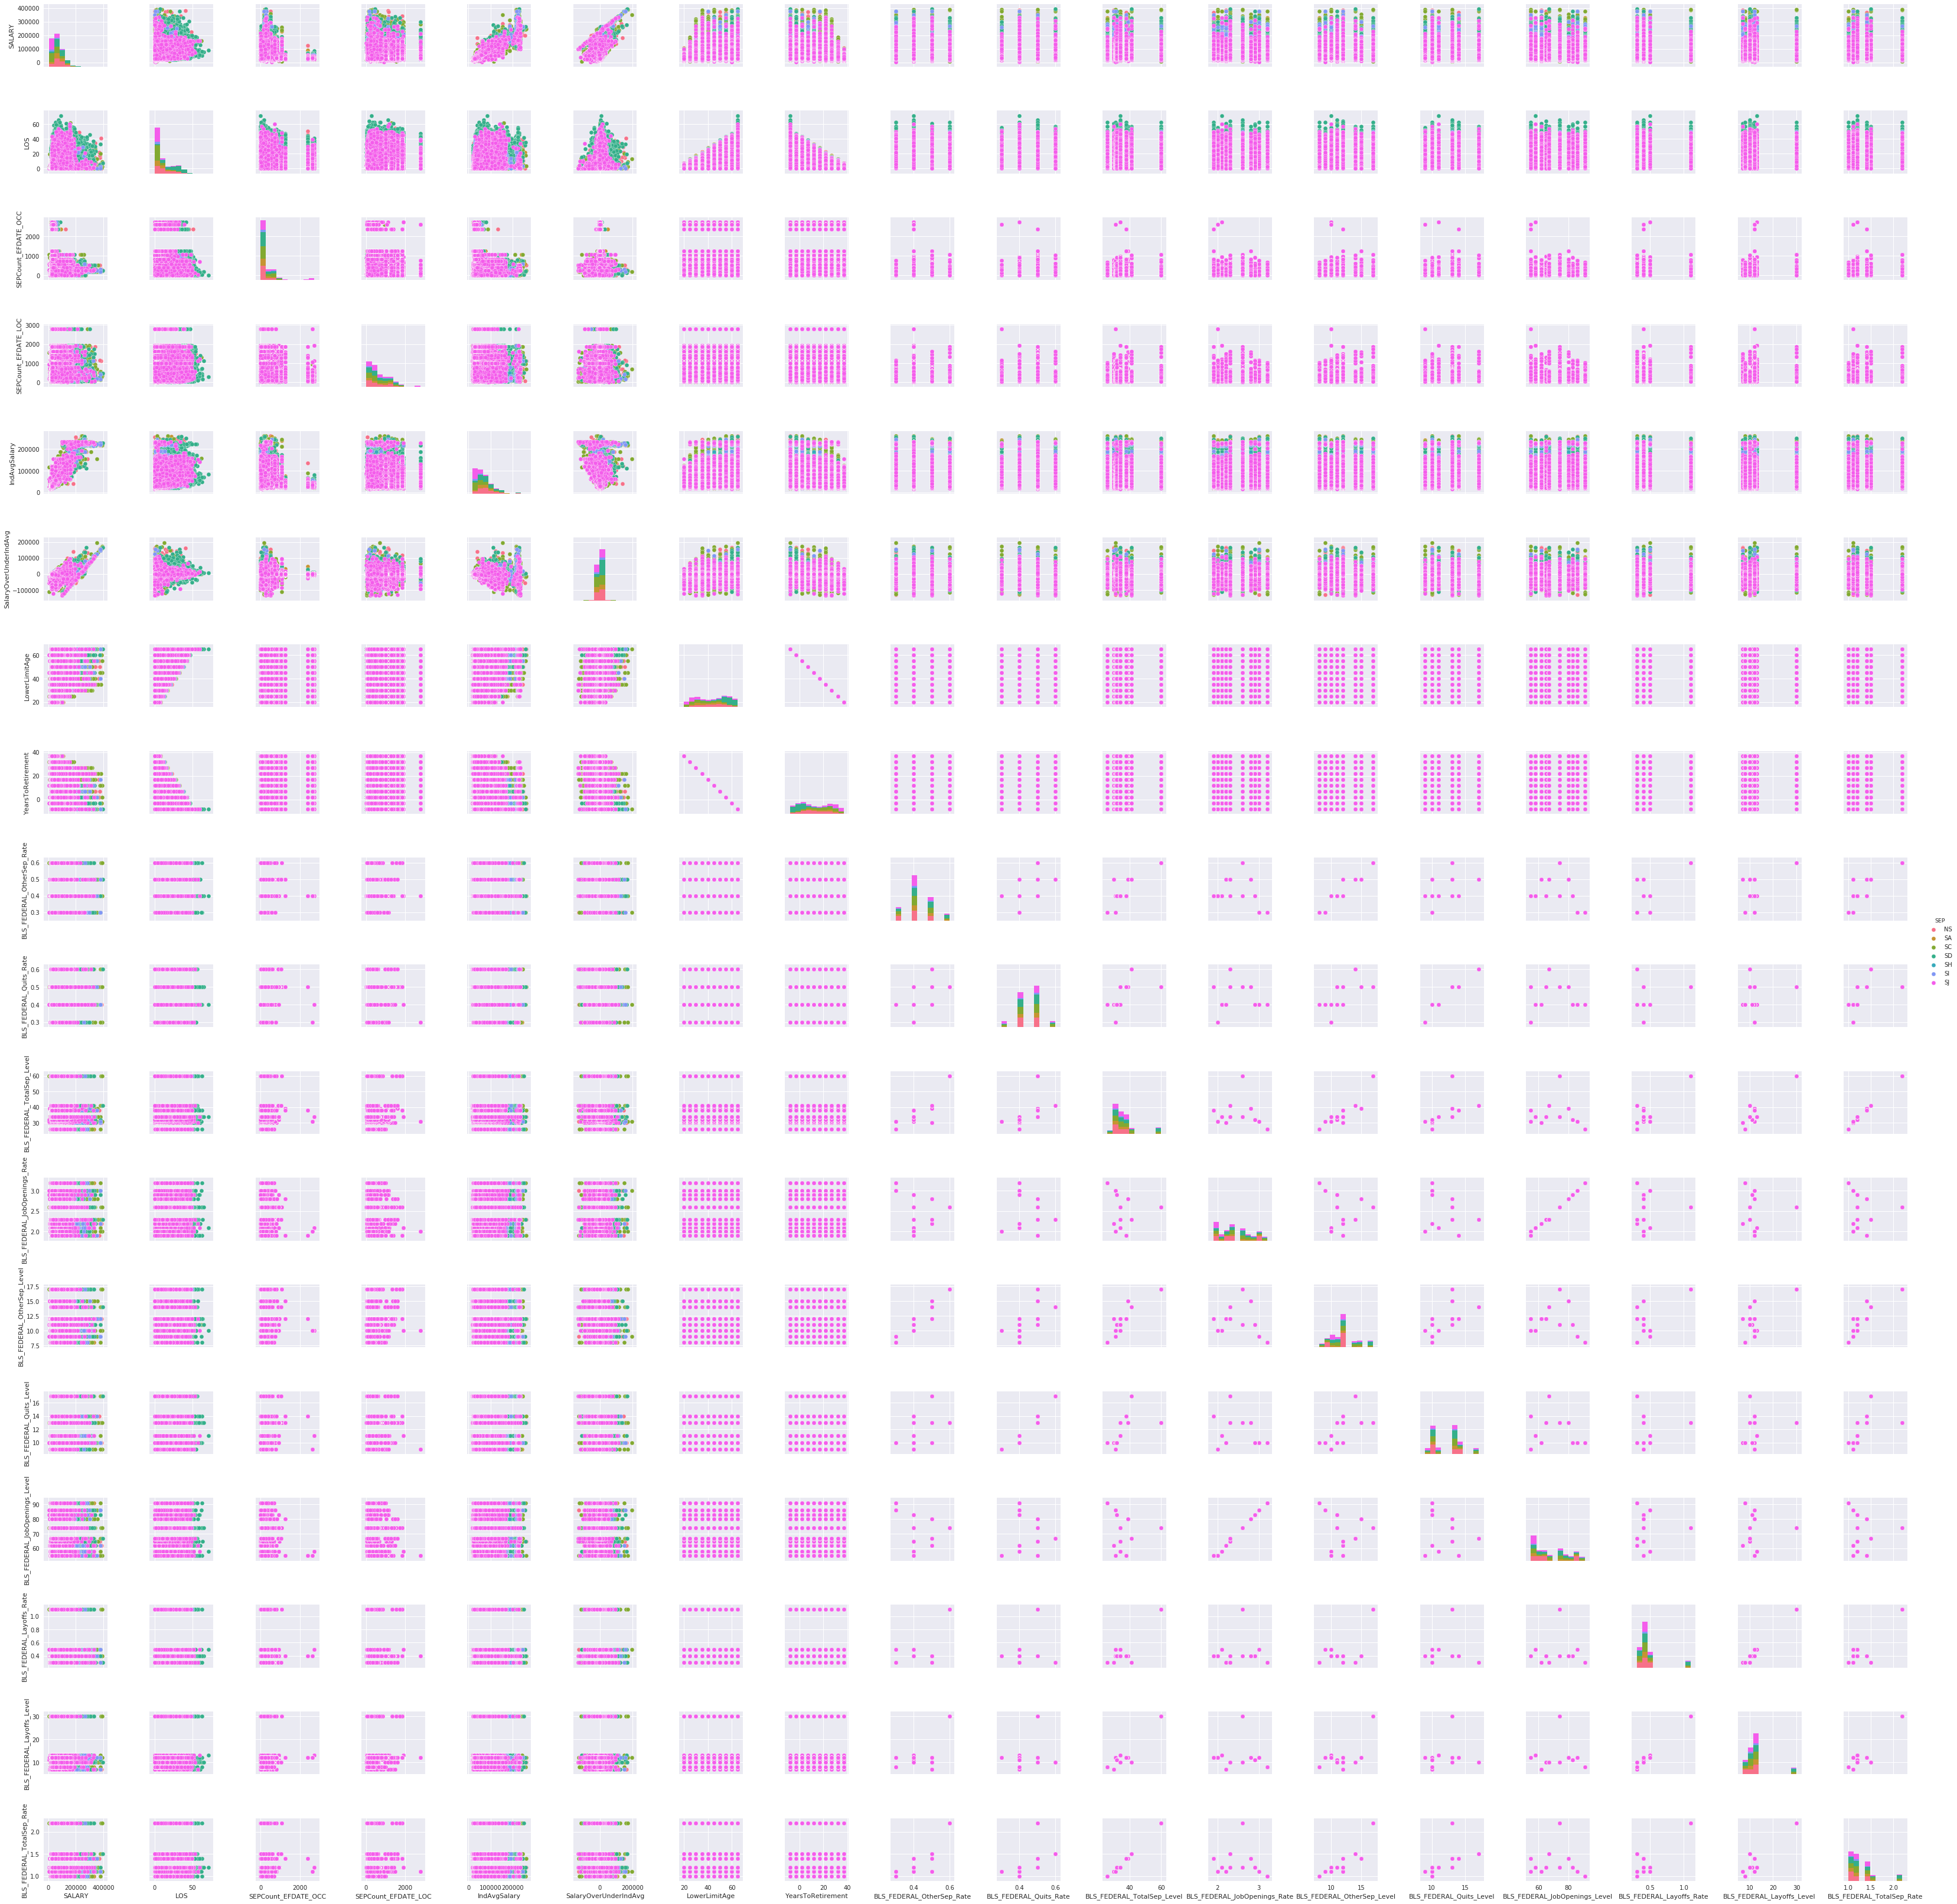

In [32]:
%%time

sns.set()
sns.pairplot(plotNumeric, hue = 'SEP')

/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


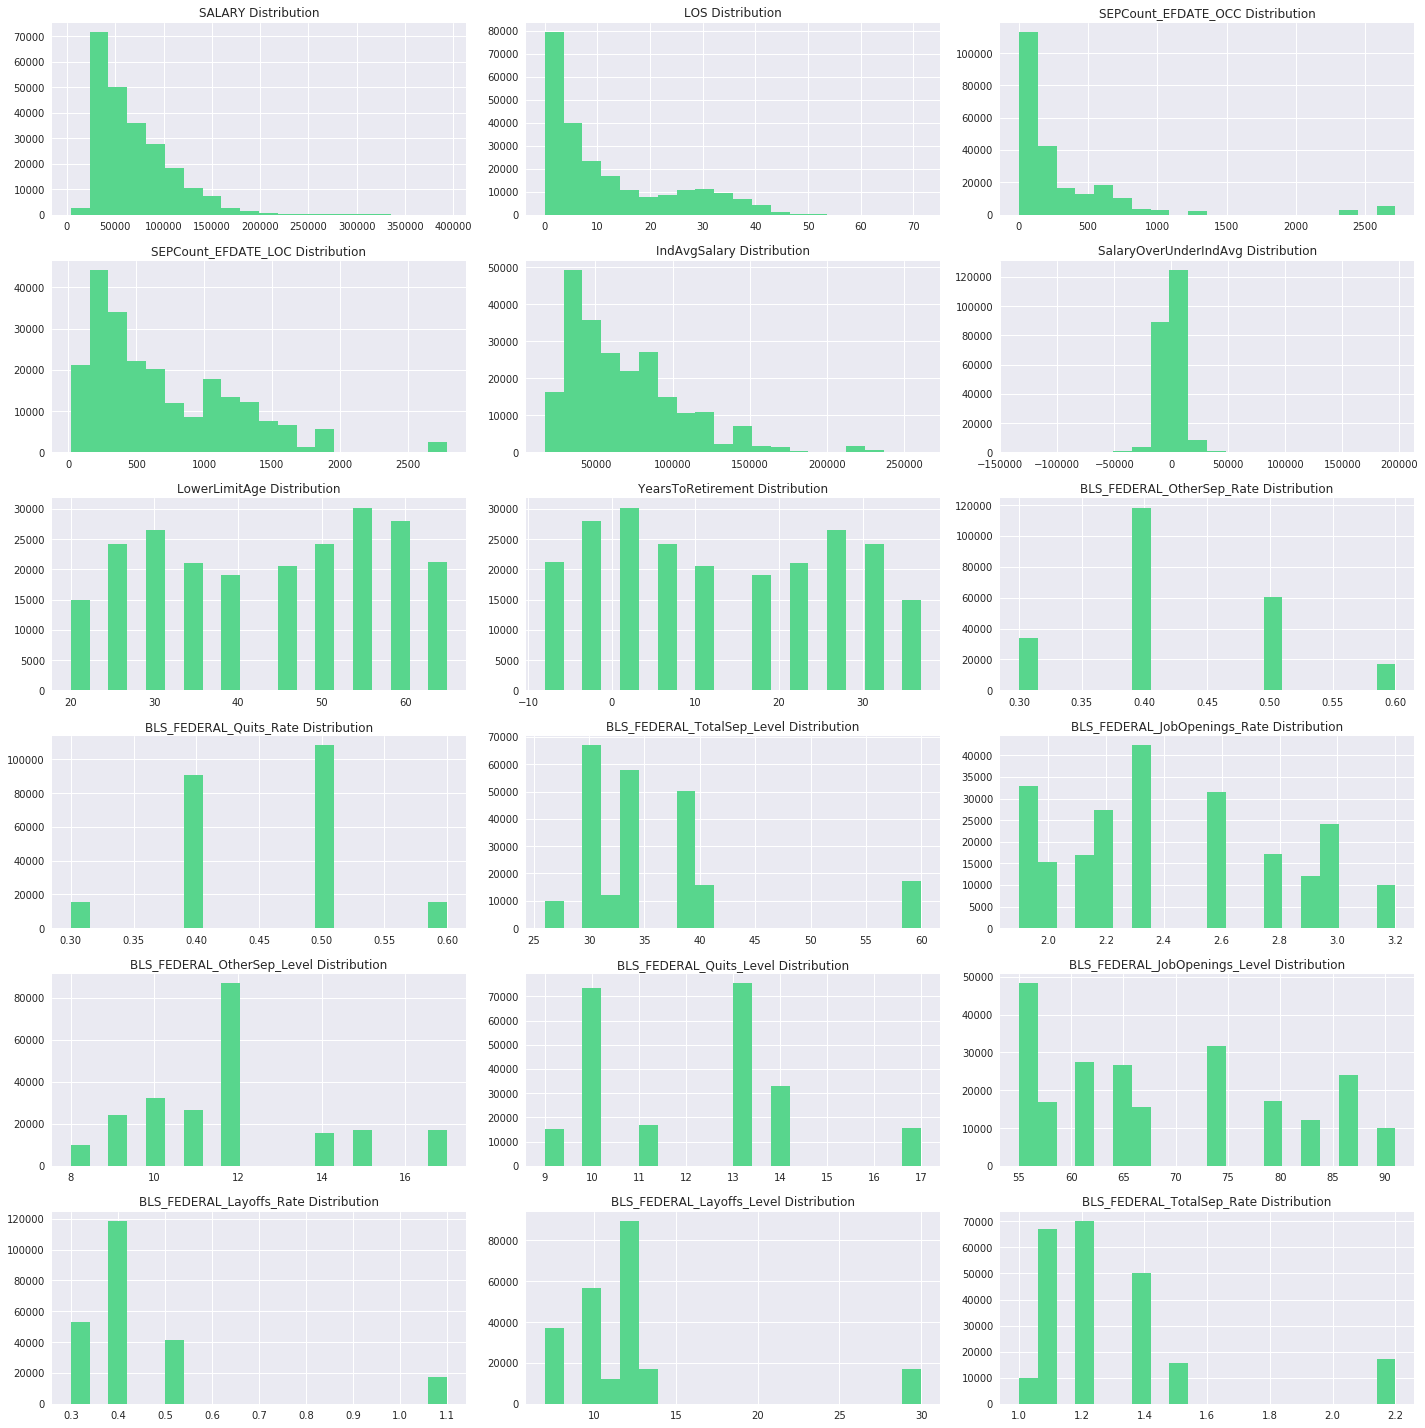

CPU times: user 4.34 s, sys: 3.62 s, total: 7.96 s
Wall time: 3.73 s


In [33]:
%%time

# Function modified from https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid
sns.set()

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax, color='#58D68D')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(plotNumeric.drop('SEP', axis=1), plotNumeric.drop('SEP', axis=1).columns, 6, 3)

/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


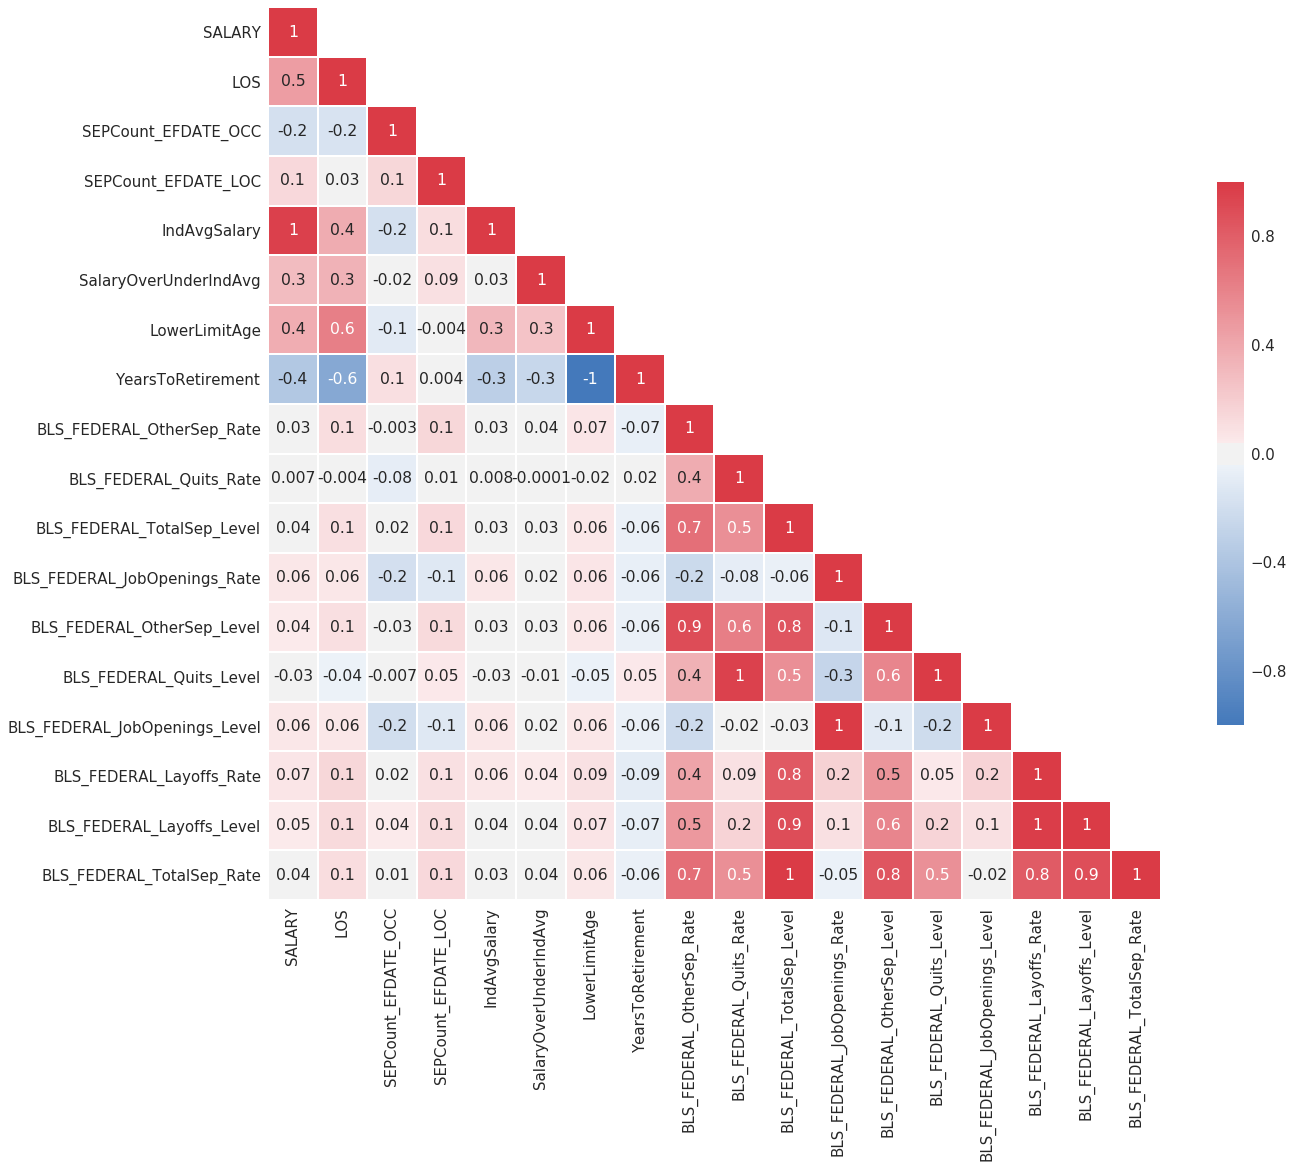

CPU times: user 2.05 s, sys: 919 ms, total: 2.97 s
Wall time: 1.93 s


In [34]:
%%time
# Inspired by http://seaborn.pydata.org/examples/many_pairwise_correlations.html

#plt.matshow(plotNumeric.corr())

sns.set(style='white')
corr = plotNumeric.drop(['SEP'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.3)
heatCorr = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
                       square=True, annot=True, linewidths=1,
                       cbar_kws={"shrink": .5}, ax=ax, fmt='.1g')
#heatCorr.
ax.tick_params(labelsize=15)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

sns.plt.show()
#sns.heatmap(corr, annot=True, linewidths=0.01, cmap=cmap, ax=ax)

Based on the distribution of attributes identified above, we have decided to take the log transform of several attributes. 
- Salary
- LOS (augmented by a value of .00001 to adjust for the undefined result of log(0)
- SEPCount_EFDATE_OCC
- SEPCount_EFDATE_LOC

In [ ]:
    # Log Transform Columns Added
SampledOPMData["SALARYLog"] = SampledOPMData["SALARY"].apply(np.log)
SampledOPMData["LOSLog"] = (SampledOPMData["LOS"] + .00001).apply(np.log)
SampledOPMData["SEPCount_EFDATE_OCCLog"] = SampledOPMData["SEPCount_EFDATE_OCC"].apply(np.log)
SampledOPMData["SEPCount_EFDATE_LOCLog"] = SampledOPMData["SEPCount_EFDATE_LOC"].apply(np.log)


We next review categorical data to improve our understanding of factor levels.

In [49]:
cols = list(SampledOPMData.select_dtypes(include=['object']))
dropCols = ["LOCTYP",
            "LOCTYPT",
            "OCCTYP",
            "OCCTYPT",
            "PPTYP",
            "PPTYPT",
            "AGYTYP",
            "OCCFAM",
            "PPGROUP",
            "PAYPLAN",
            "TOATYP",
            "WSTYP",
            "AGYSUBT",
            "AGELVL",
            "LOSLVL",
            "LOC",
            "OCC",
            "PATCO",
            "SALLVL",
            "TOA",
            "WORKSCH"]

for i in dropCols:
    cols.remove(i)

plotCat = SampledOPMData[cols].dropna()
display(plotCat.head())
print("plotCat Has {0} Records".format(len(plotCat)))
print("Number of colums = ", len(cols))

AGYSUB SEP DATECODE GENDER GSEGRD  PPGRD                                          AGYTYPT AGY                                        AGYT QTR AGELVLT           LOSLVLT                     LOCT                                      OCCFAMT                                               OCCT              PATCOT                 PPGROUPT             PAYPLANT            SALLVLT        TOATYPT                              TOAT         WSTYPT               WORKSCHT
49996   HSCB  SA   201410      F     06  GS-06                           Cabinet Level Agencies  HS          HS-DEPARTMENT OF HOMELAND SECURITY   1   20-24       1 - 2 years              24-MARYLAND  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS             0303-MISCELLANEOUS CLERK AND ASSISTANT           Technical  Standard GSEG Pay Plans  GS-GENERAL SCHEDULE  $30,000 - $39,999  Non-permanent       48-Excepted Service - Other      Full-time  Full-time Nonseasonal
49998   NV25  SA   201410      F     11  GS-11                           Cabinet Level Agencies  NV                   NV-DEPARTMENT OF THE NAVY   1   20-24       3 - 4 years  11-DISTRICT OF COLUMBIA  02xx-PERSONNEL MGMT & INDUSTRIAL  RELATIONS                    0201-HUMAN RESOURCES MANAGEMENT      Administrative  Standard GSEG Pay Plans  GS-GENERAL SCHEDULE  $60,000 - $69,999      Permanent   10-Competitive Service - Career      Full-time  Full-time Nonseasonal
49999   BG00  SA   201410      F     05  GS-05  Medium Independent Agencies (100-999 employees)  BG     BG-PENSION BENEFIT GUARANTY CORPORATION   1   20-24  Less than 1 year  11-DISTRICT OF COLUMBIA  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0399-ADMINISTRATION AND OFFICE SUPPORT STUDENT...  Other White Collar  Standard GSEG Pay Plans  GS-GENERAL SCHEDULE  $30,000 - $39,999  Non-permanent  45-Excepted Service - Schedule D  Not Full-time  Part-time Nonseasonal
50000   DD35  SA   201410      M     05  GS-05                           Cabinet Level Agencies  DD                    DD-DEPARTMENT OF DEFENSE   1   20-24       1 - 2 years              36-NEW YORK                   05xx-ACCOUNTING AND BUDGET                         0525-ACCOUNTING TECHNICIAN           Technical  Standard GSEG Pay Plans  GS-GENERAL SCHEDULE  $30,000 - $39,999  Non-permanent            20-Competitive Service      Full-time  Full-time Nonseasonal
50002   HE34  SA   201410      F     02  GS-02                           Cabinet Level Agencies  HE  HE-DEPARTMENT OF HEALTH AND HUMAN SERVICES   1   20-24  Less than 1 year              24-MARYLAND  03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS  0399-ADMINISTRATION AND OFFICE SUPPORT STUDENT...  Other White Collar  Standard GSEG Pay Plans  GS-GENERAL SCHEDULE  $20,000 - $29,999      Permanent  35-Excepted Service - Schedule D      Full-time  Full-time Nonseasonal

plotCat Has 129821 Records
Number of colums =  23


### AGYSUB
High seperation among following:
* Veterans Health Administration (VATA)
* Forest Service (AG11)

### GENDER
Similar separation distributions among males and females, except more terminations due to contract expiration among males

### GSEGRD
High termination due to expired appt/other among following:
* 3
* 4
* 5

Bimodal Quit distribution with outlier spike at GSEGRD 9:
* Distribution 1 from GSEGRD 3 to 8
* Distribution 2 from GSEGRD 11 to 15

Individual transfers highest among levels 11, 12, 13

### PPGRD
Majority of distribution resides in GS values per the GSEGRD observations described above.... <font color="red">Are other PPGRD values of any significance? What are corporate grades all about?</font>

### AGYT
Top three Agencies with separation:
1. AR-Department of the Army
2. AG-Department of Agriculture
3. VA-Department of Veteran Affairs

High contract termination in:
* AG-Department of Agriculture
* IN-Department of the Interior

While Veteran Affairs and Army both have many quits and many retirees, the Army has significantly more individual transfers (on par with retirements)

### QTR
Most contract terminations in 1st and 4th quarters

Retirement peaks in 2nd quarter

Number of quits increases from one quarter to the next

<font color="purple">*Bear in mind these are quarters from single year only so time-sensitive trends may not be applicable*</font>

### AGELVLT
High termination due to expired appt/other among following:
* B
* C

Number of Quits peaks at AGELVL D

Individual transfer counts mostly trend with Quits

Retirement highest at following:
* I
* J
* K

### LOSLVLT
Highest Quit count for LOSLVL A (< 1 year service) which then declines for levels B and C before spiking again at level D (5-9 years service)

Same pattern is observed for contract terminations but without any significant spikes with longer service

Large individual transfer spike at LOSLVL D (5-9 years service)

Retirement starts at LOSLVL D but trends upward to J

### LOCT


In [50]:
def subCountPlot(att1, att2, thresh):
    counts = plotCat.groupby([att1, att2]).size().unstack(fill_value=0) # Get att1 sizes by att2
    counts = pd.concat([counts,counts.sum(axis=1)], axis=1) # Calculate total for each att1 value and append total as new column
    counts.rename(columns={0:"Total"}, inplace=True)
    top = counts[counts["Total"] > thresh].index.tolist() # Obtain att1 values where total surpasses threshold
    
    zoom = plotCat[plotCat[att1].isin(top)] # Subset data to only the top att1 values
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharey=False)
    sns.countplot(y=att1, data=zoom, color="blue", ax=ax1); # Dark blue signifies zoomed data
    sns.countplot(y=att1, data=zoom, hue=att2, palette="hls", ax=ax2);

In [51]:
temp = cols[:2] # for quick visualization debug only; may delete once complete

/usr/local/es7/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


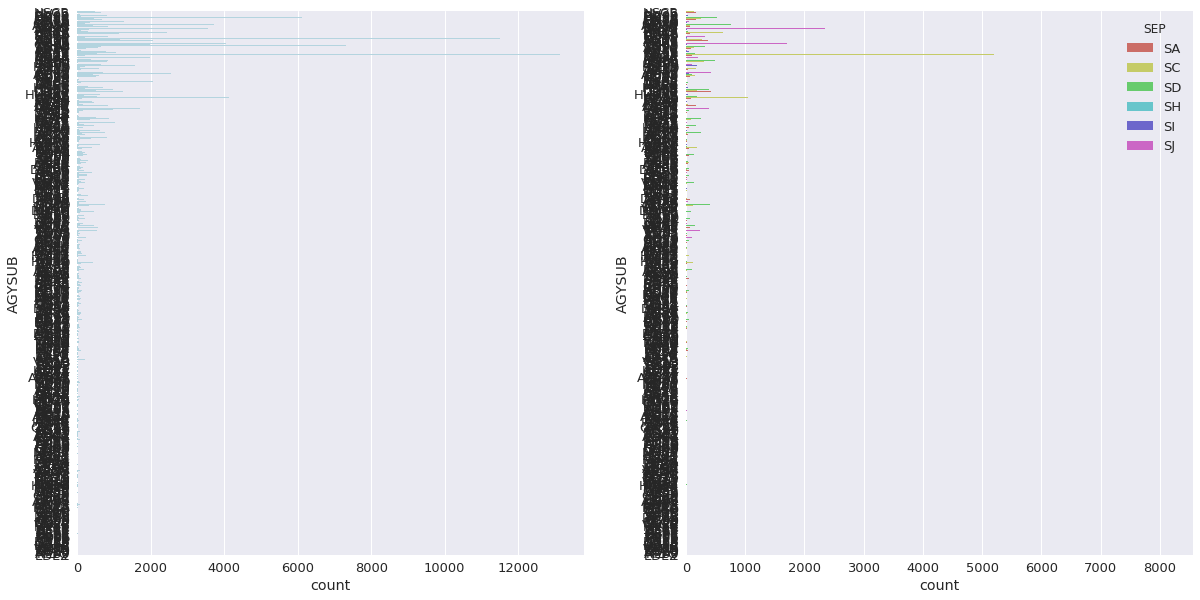

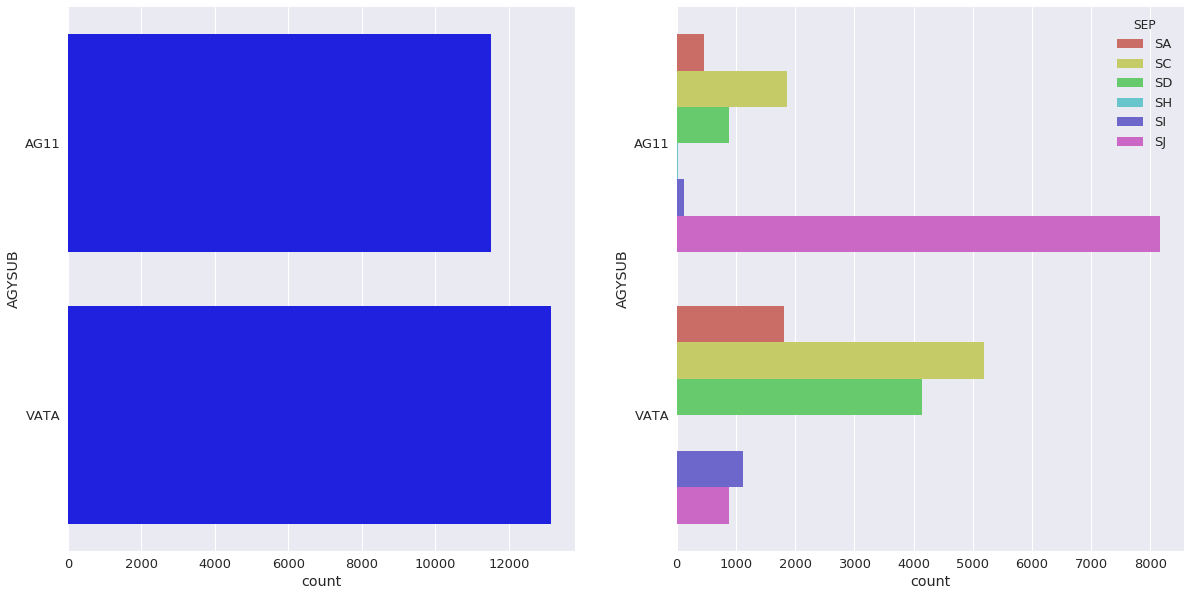

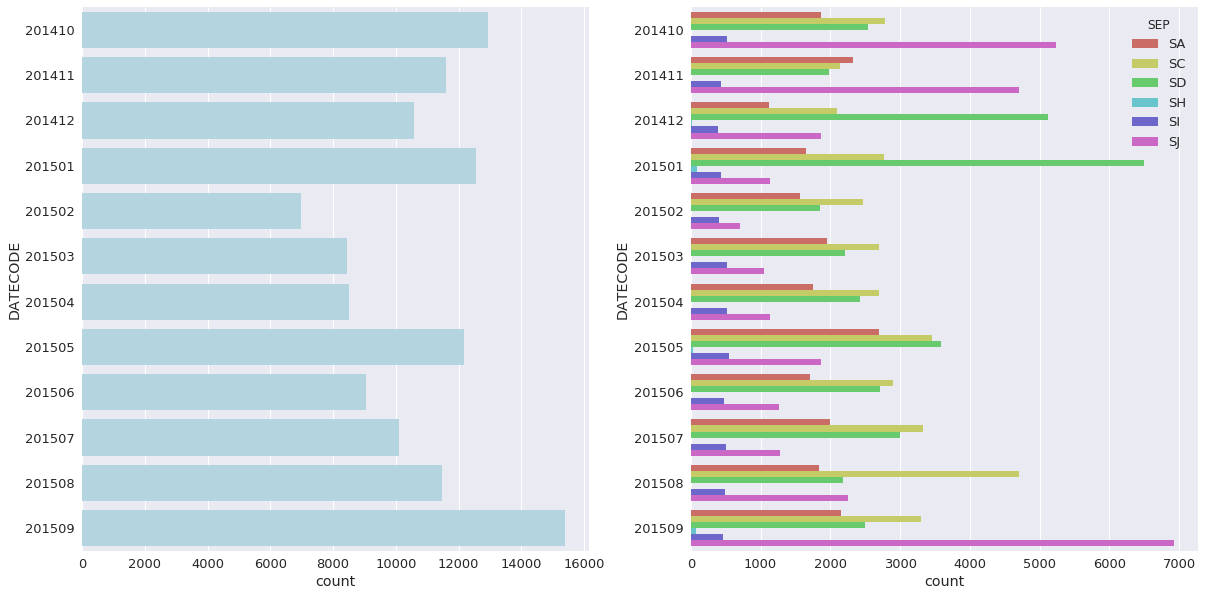

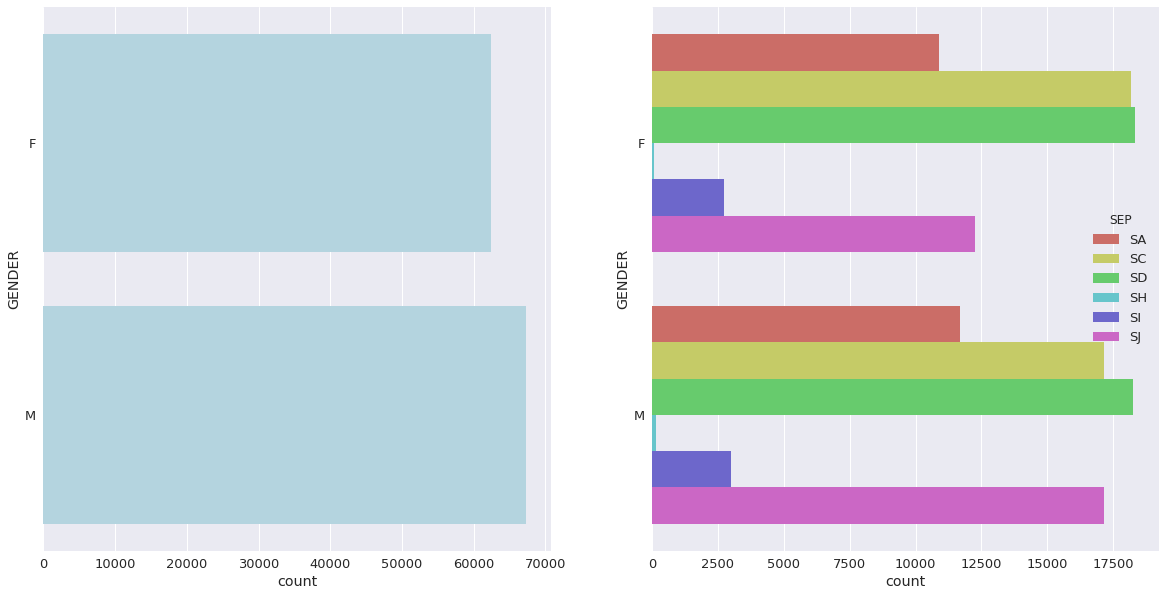

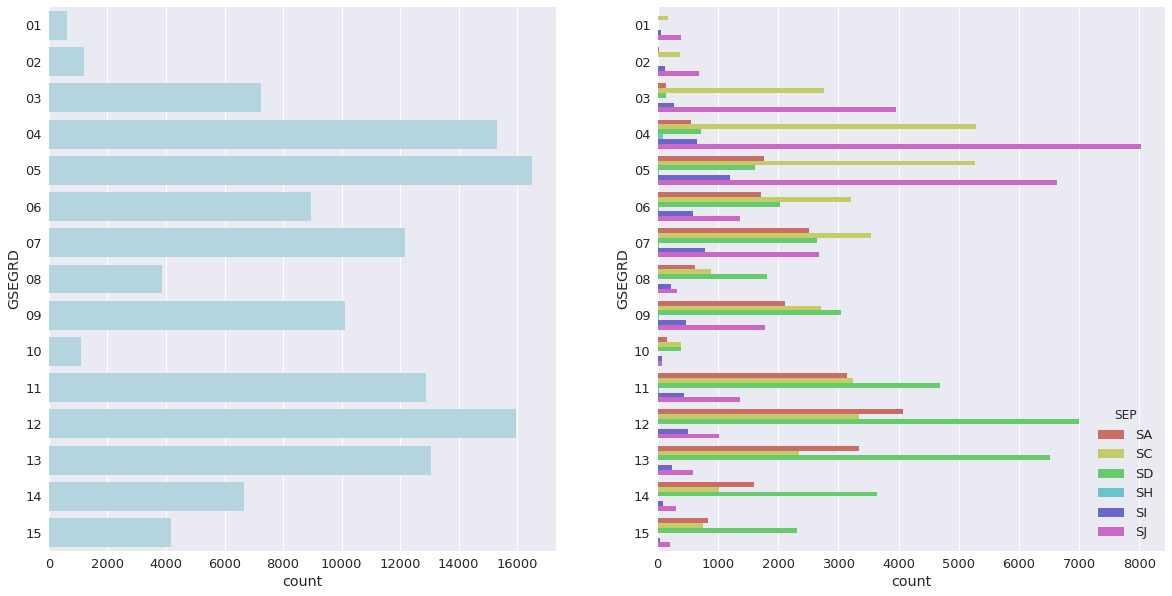

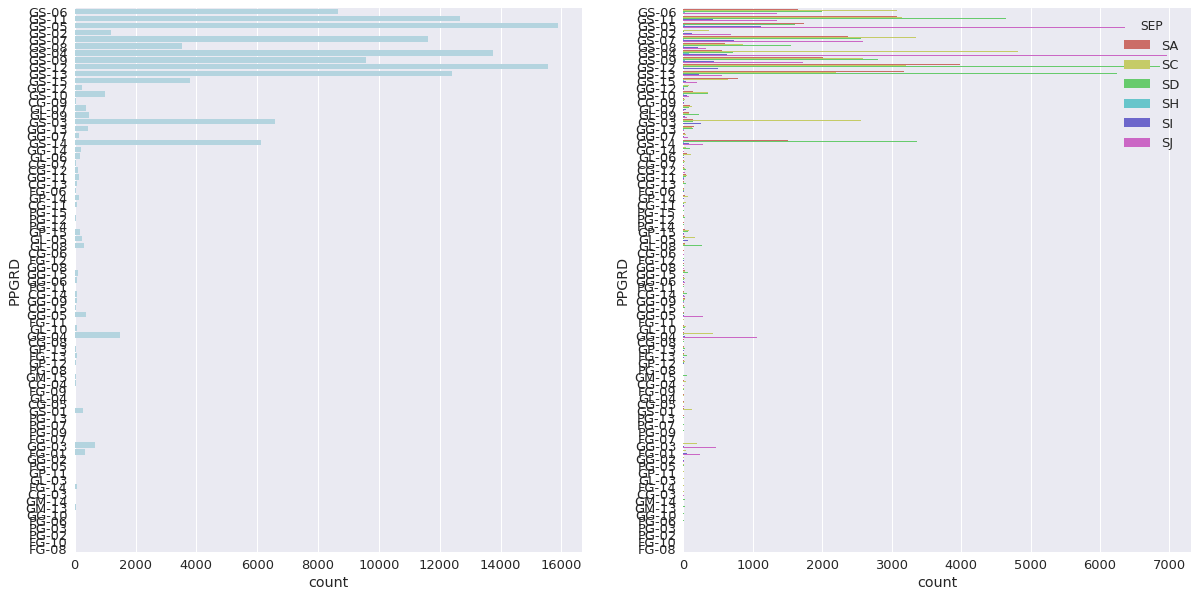

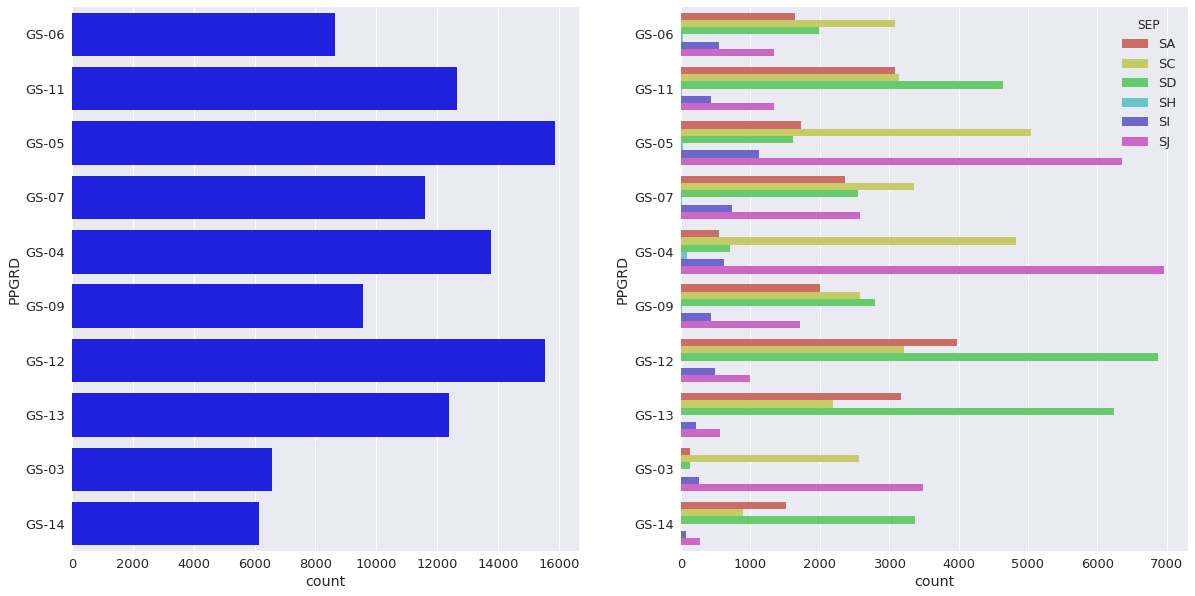

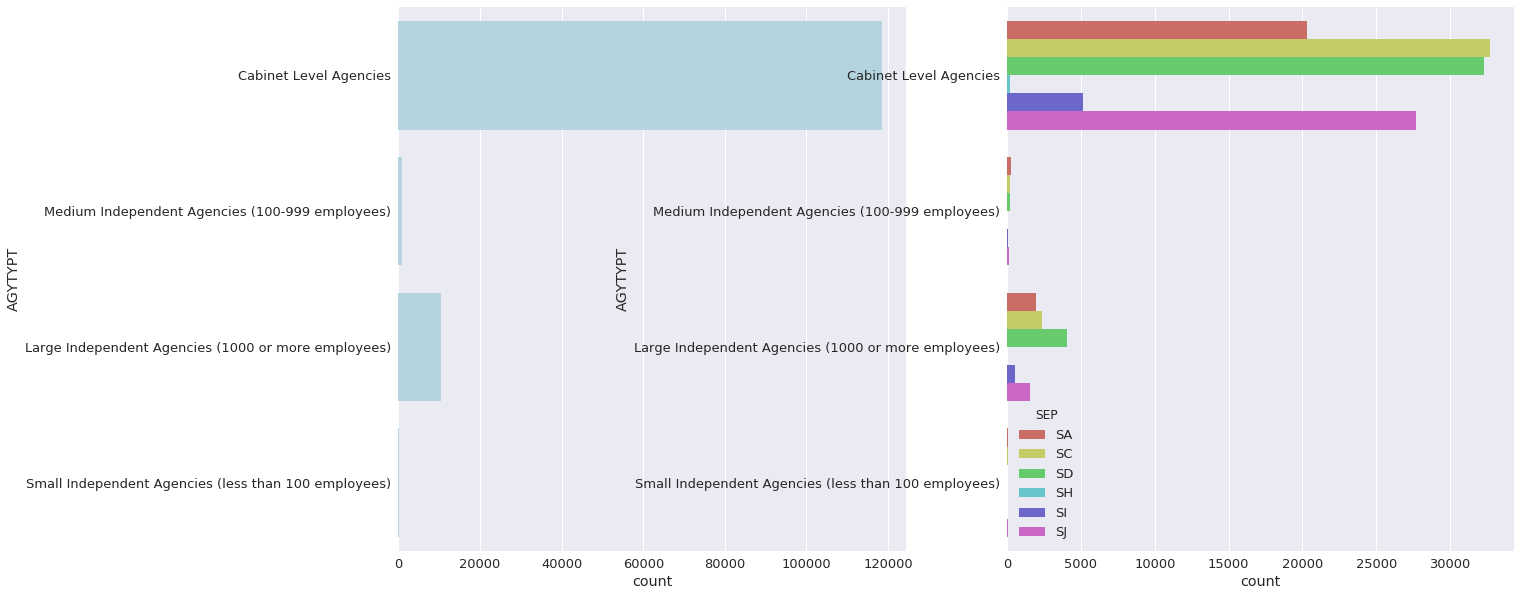

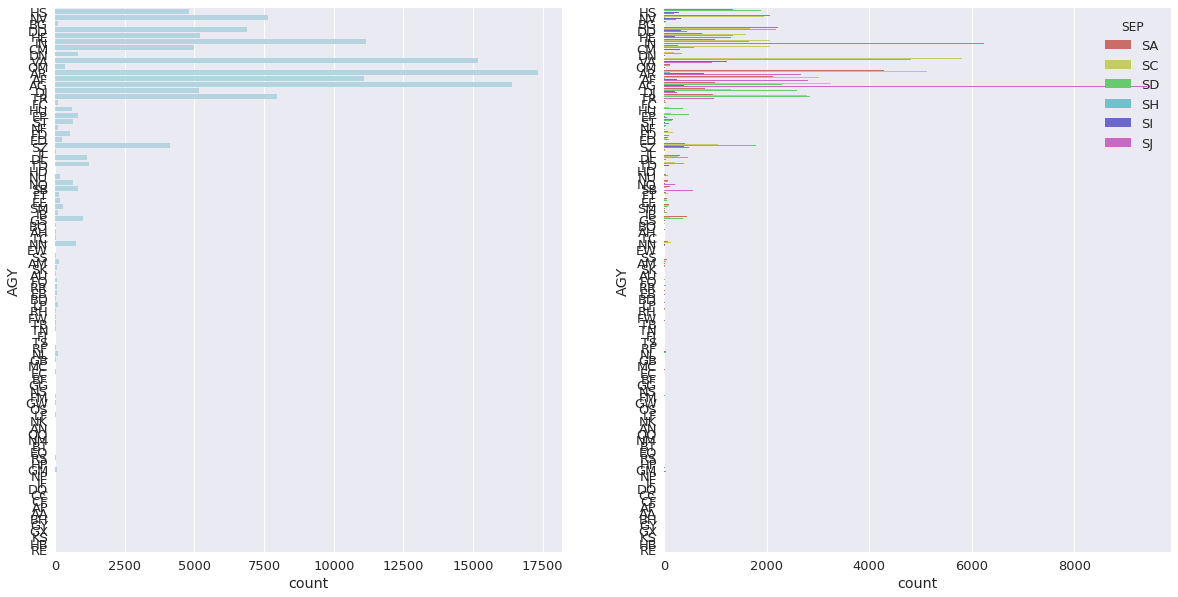

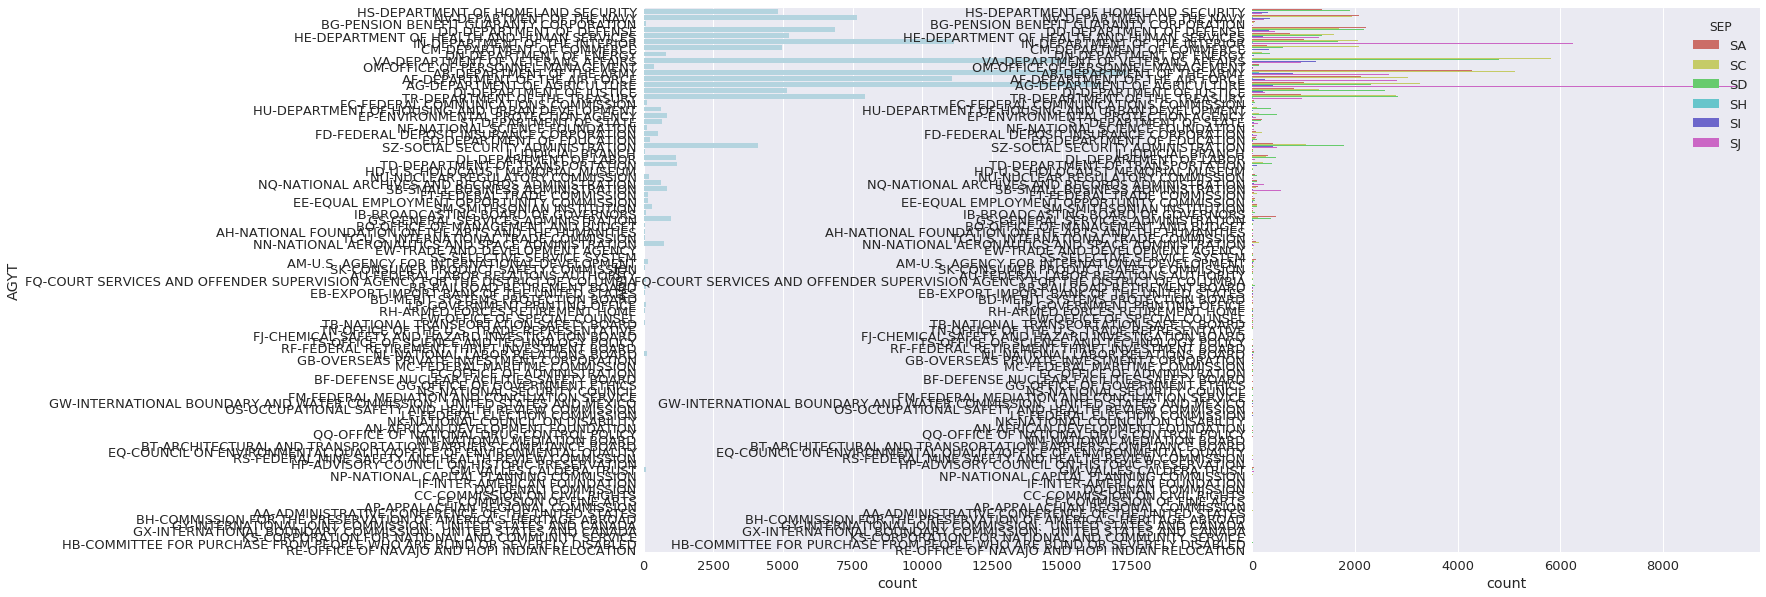

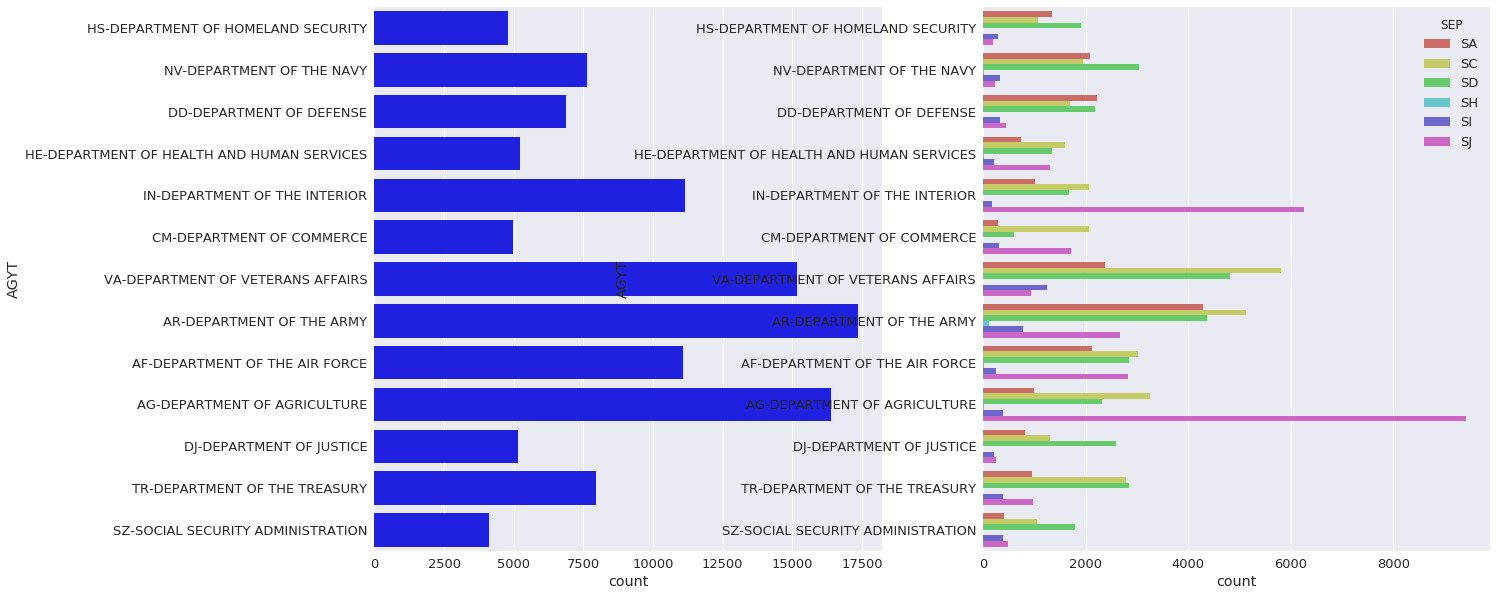

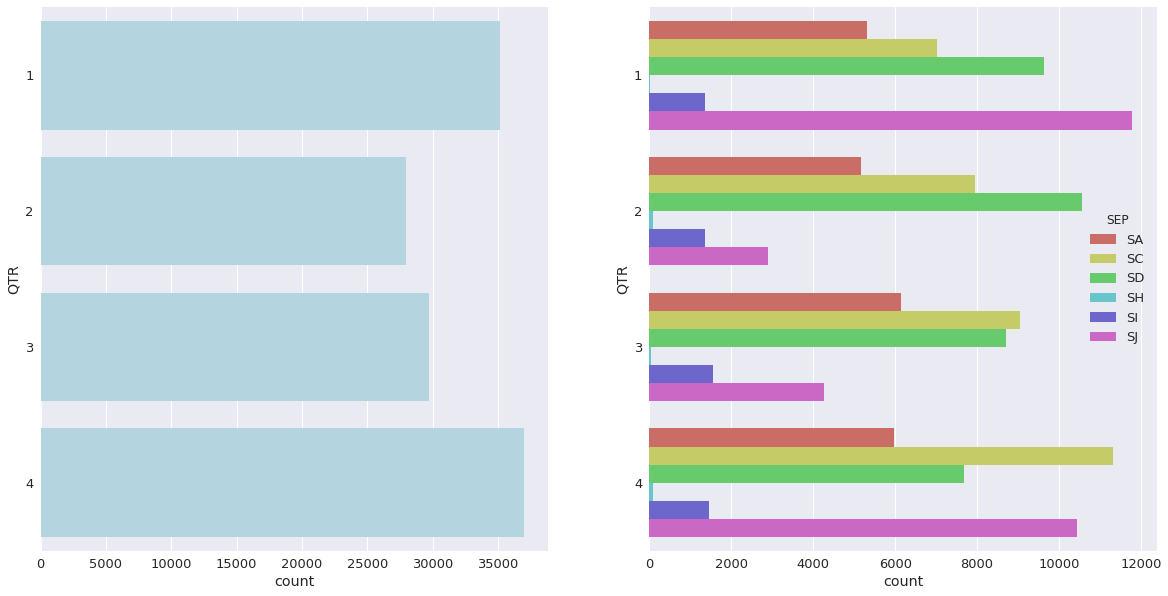

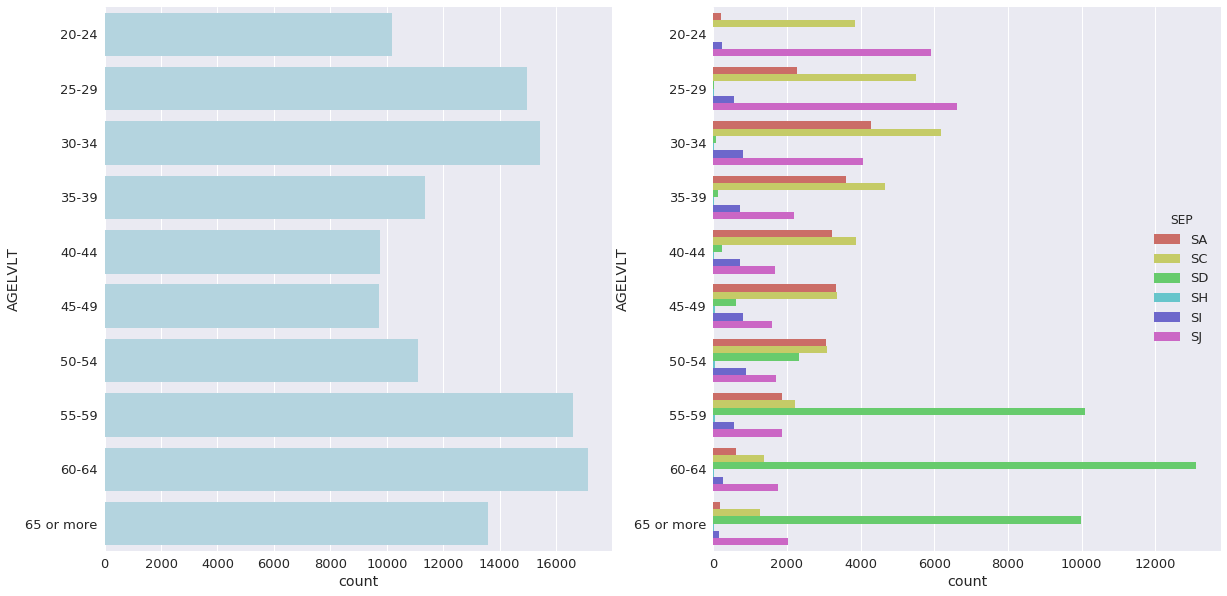

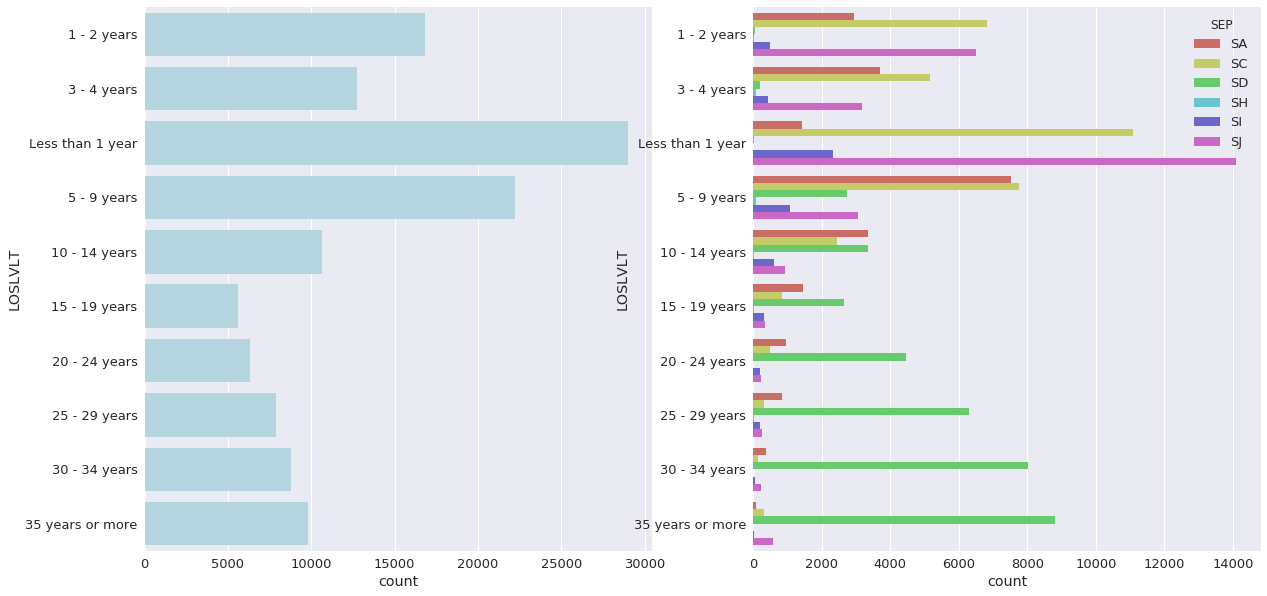

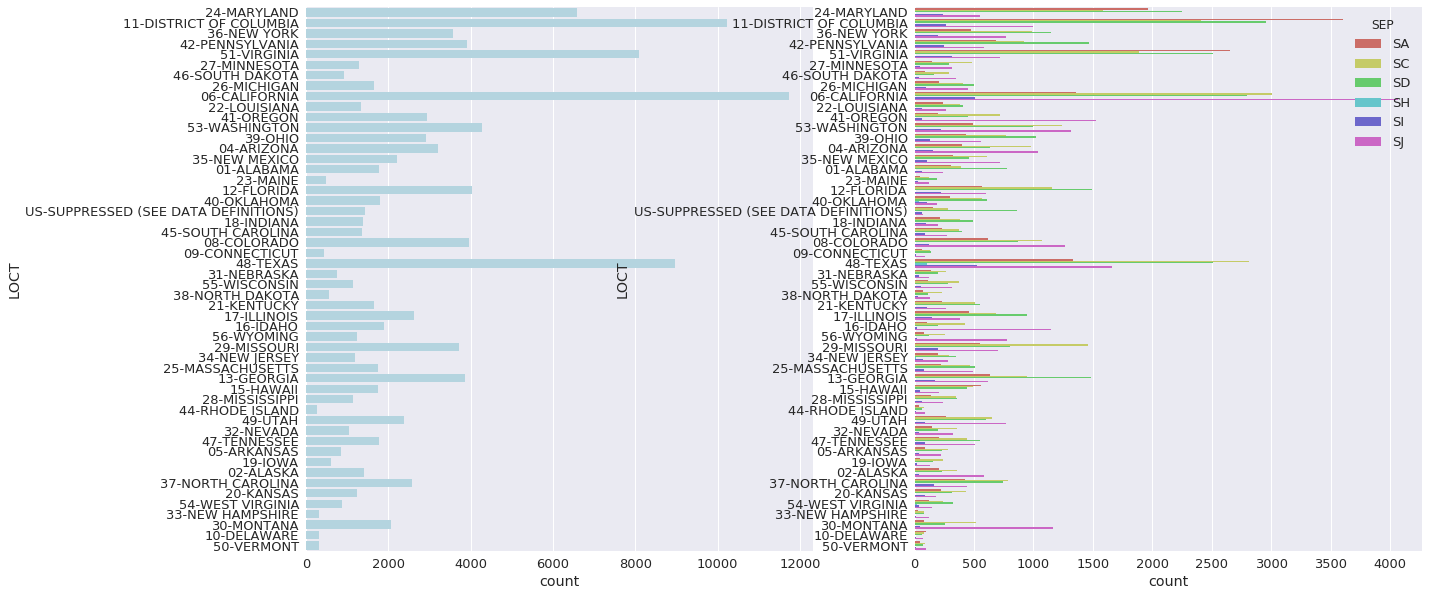

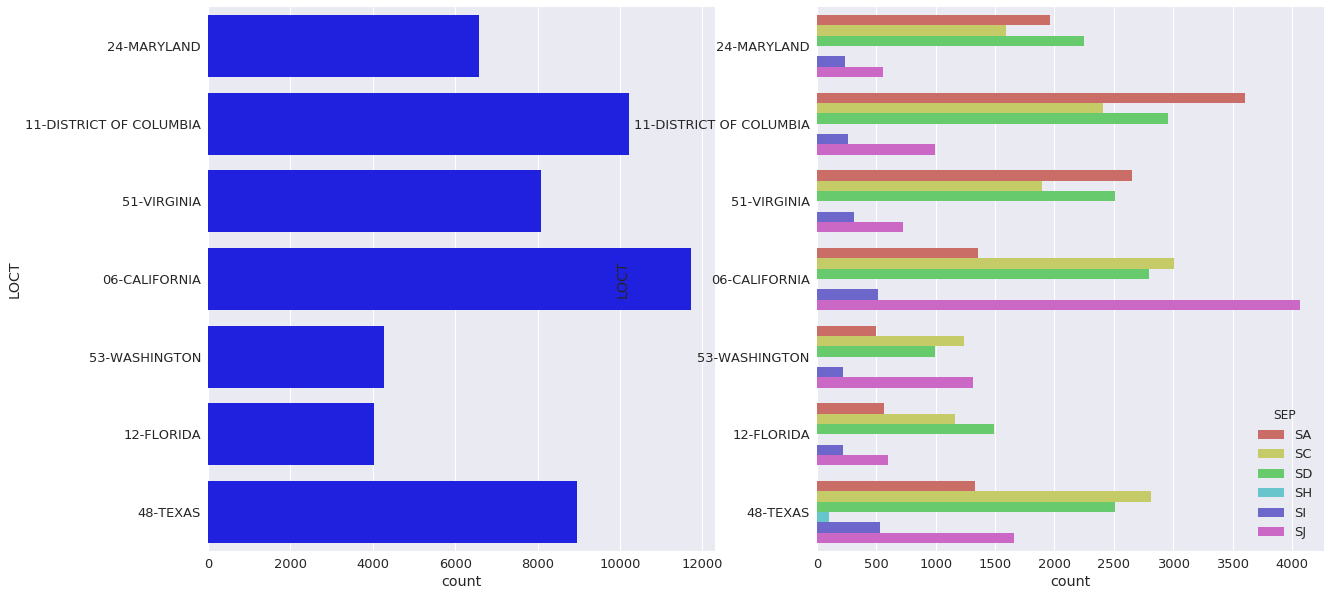

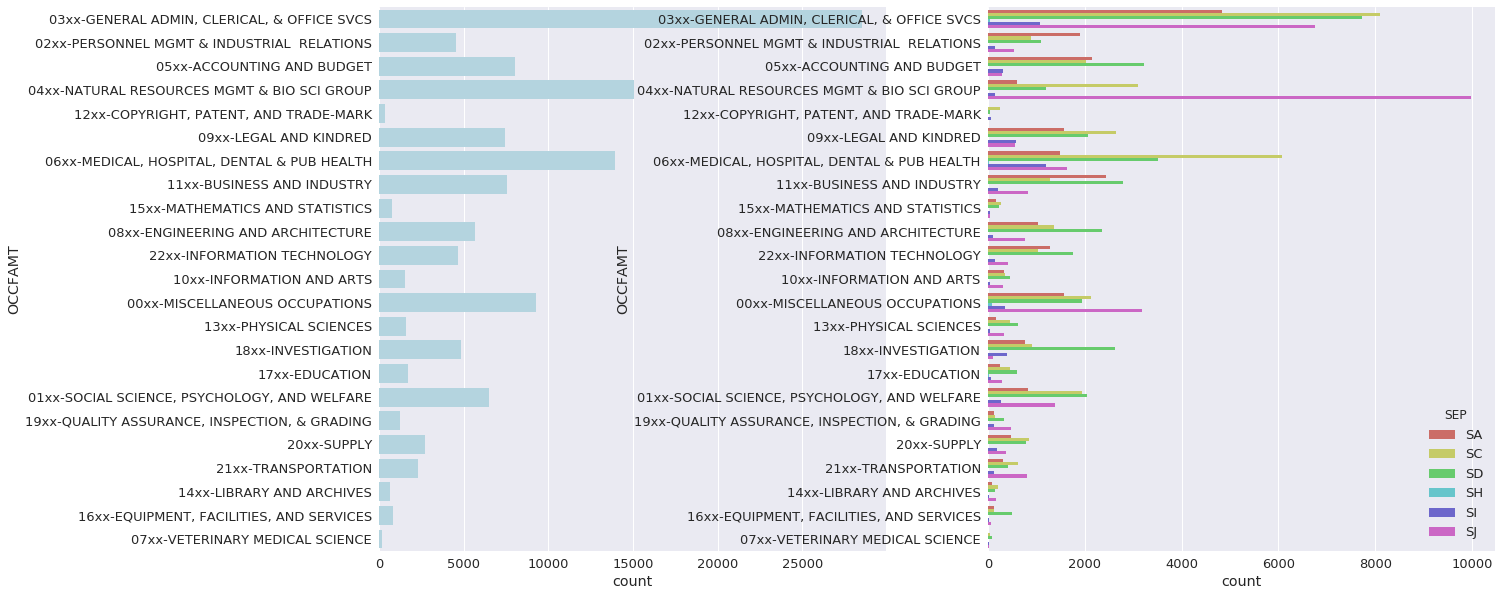

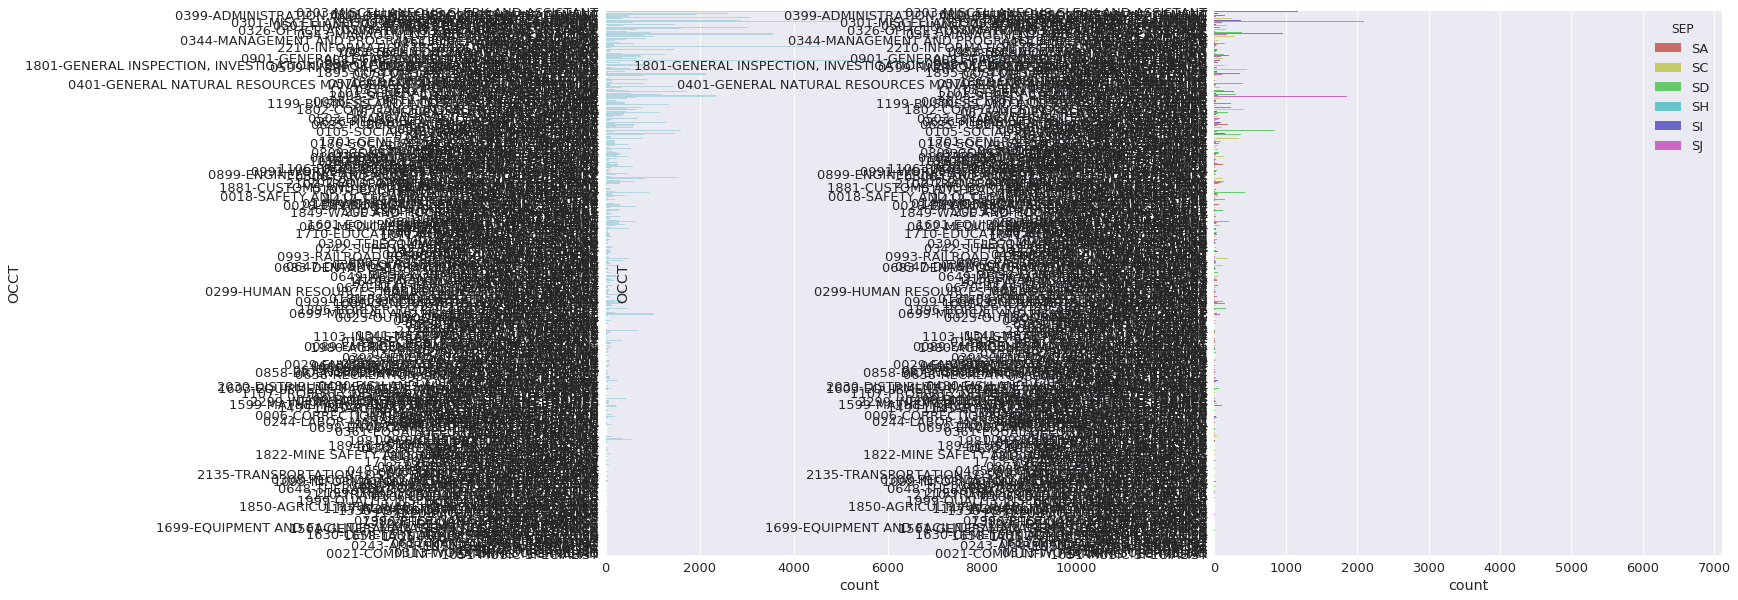

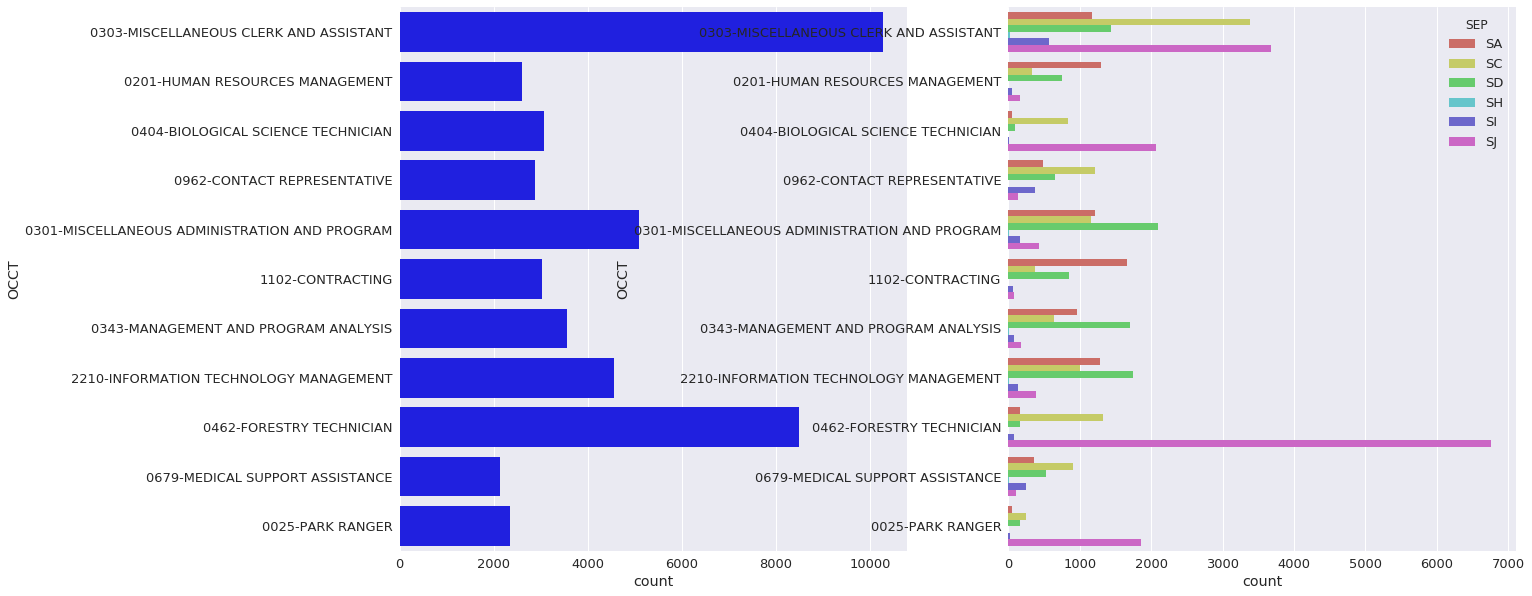

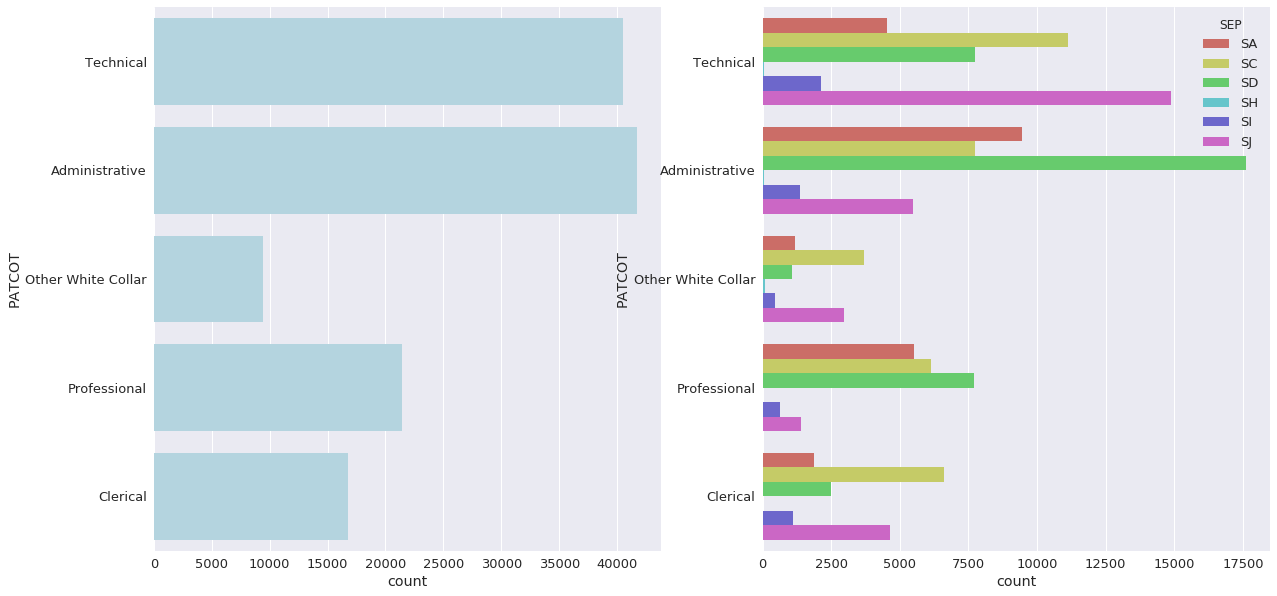

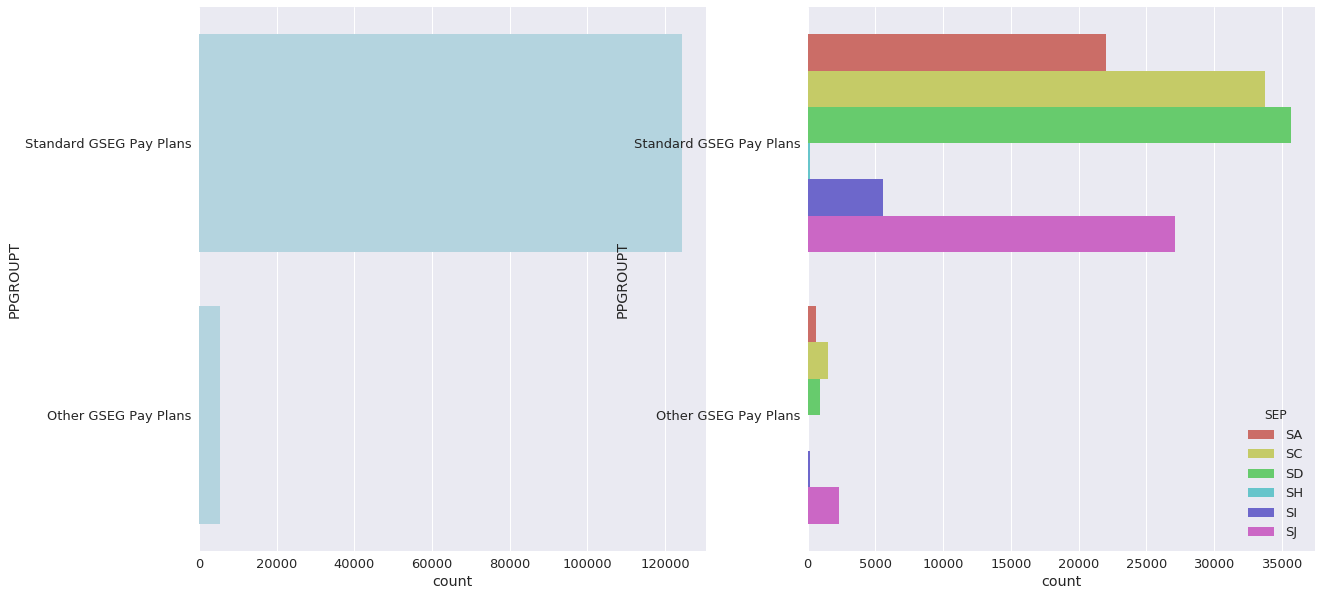

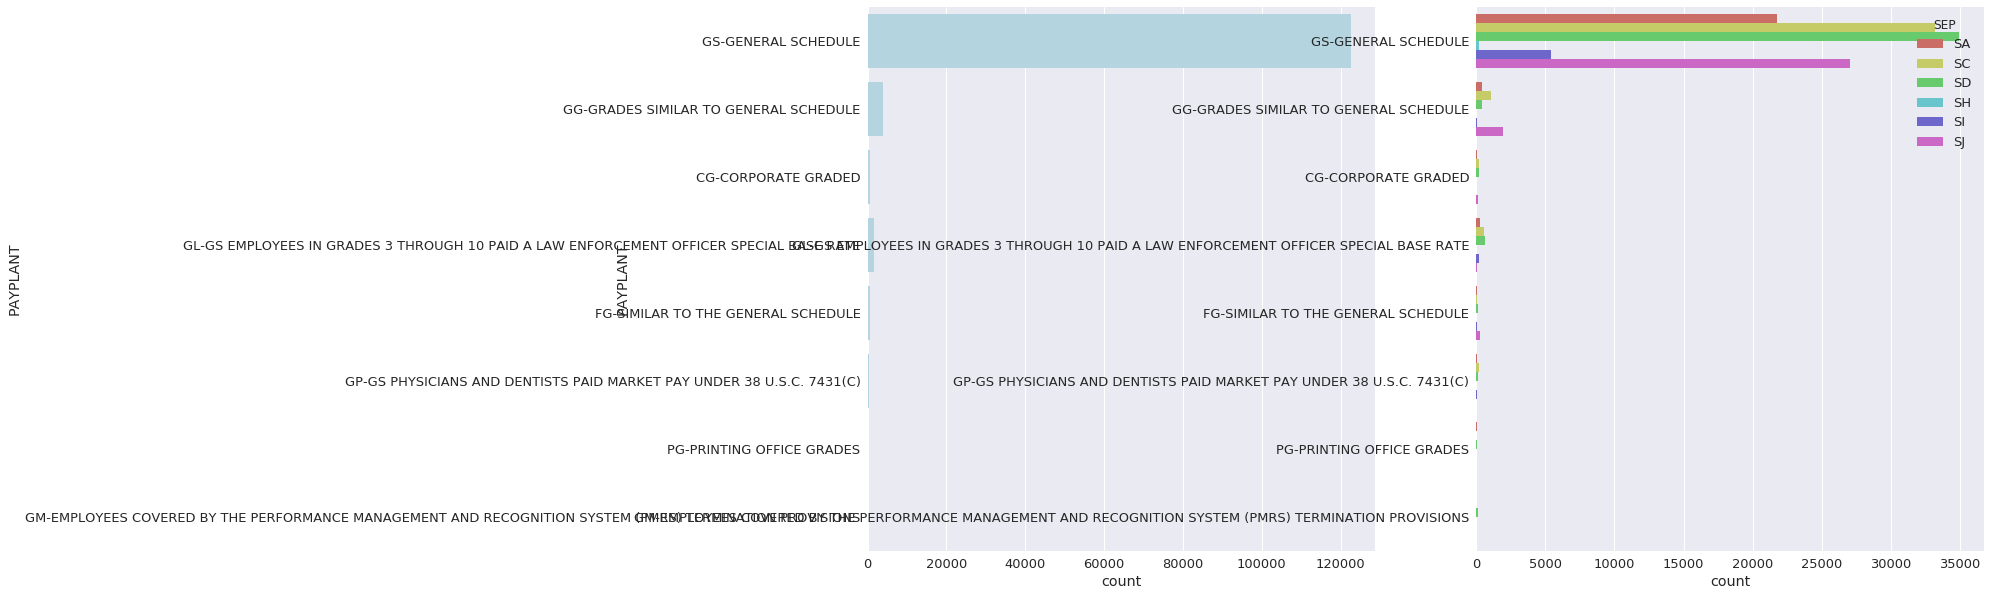

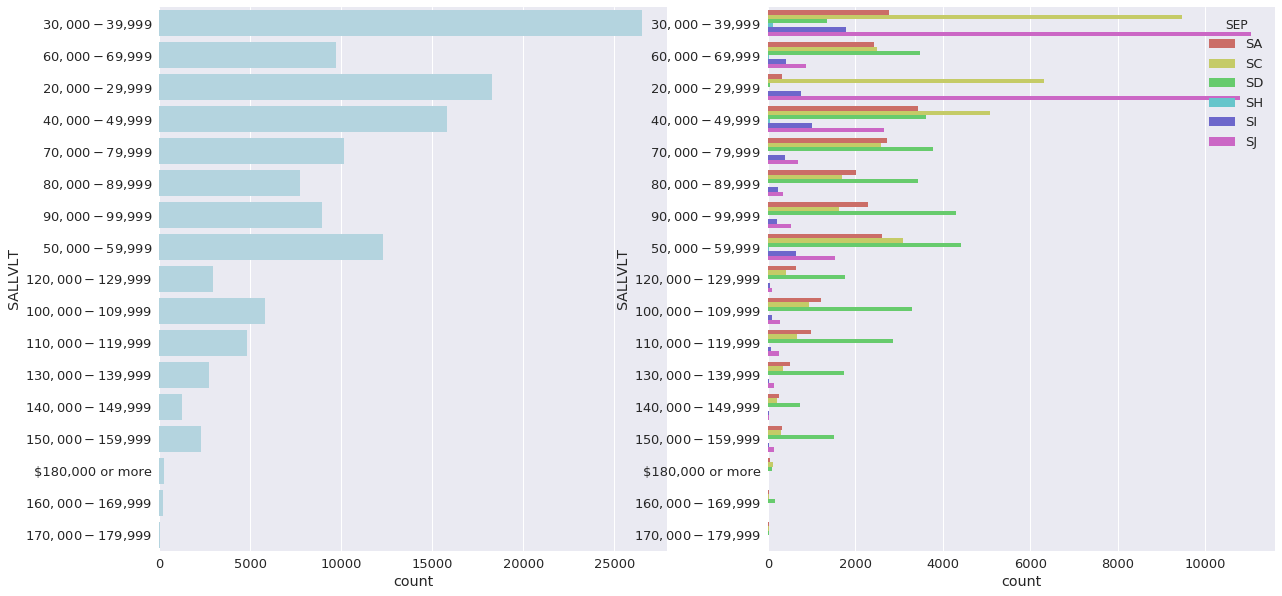

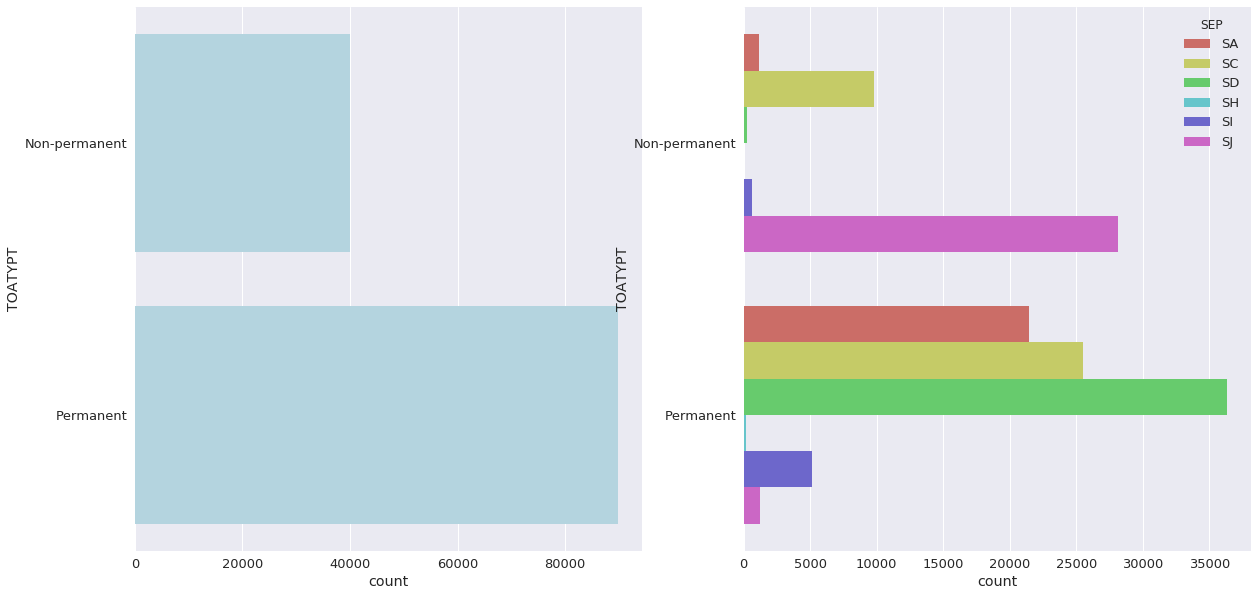

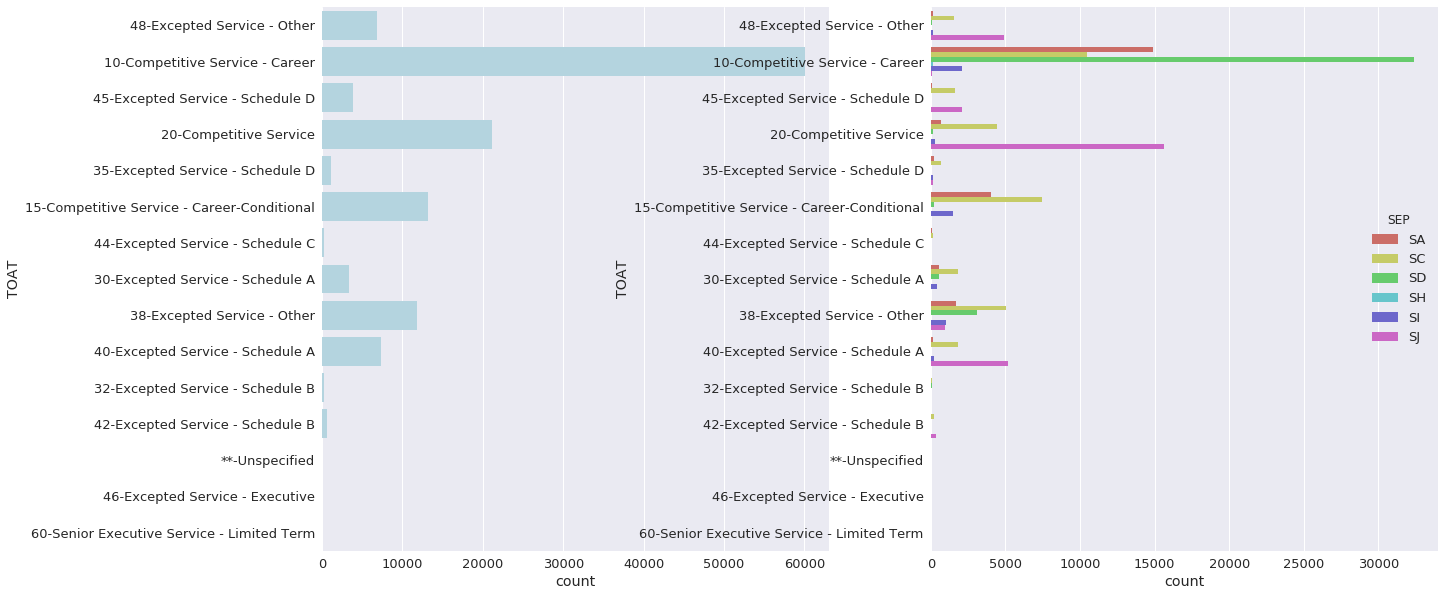

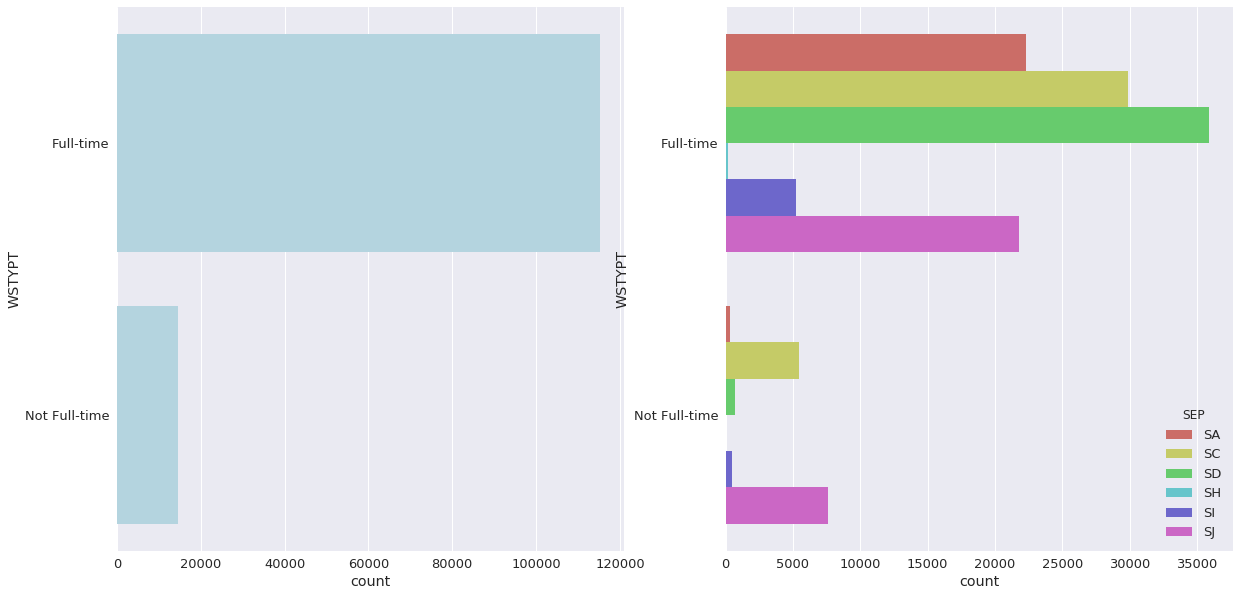

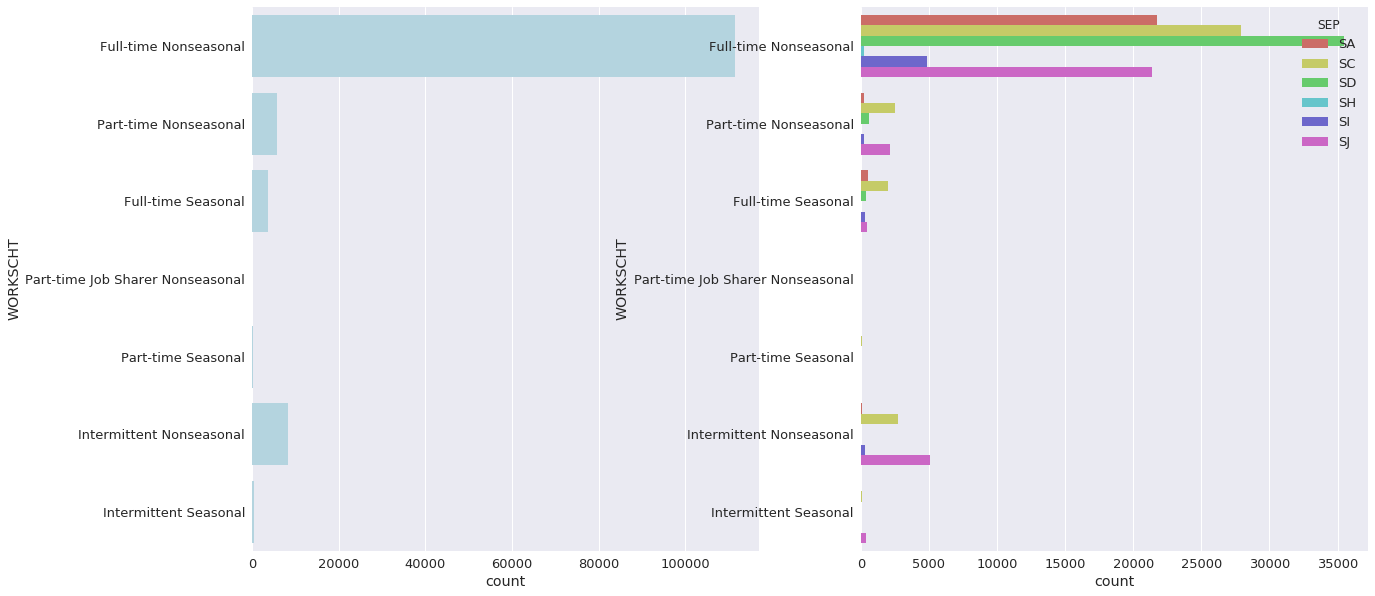

In [54]:
for i in cols:
    if i != 'SEP':
        plt.figure(i) # Required to create new figure each loop rather than drawing over previous object
        f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharey=False)
        sns.countplot(y=i, data=plotCat, color="lightblue", ax=ax1);
        sns.countplot(y=i, data=plotCat, hue="SEP", palette="hls", ax=ax2);
        
    if i == 'AGYSUB':
        subCountPlot(i, 'SEP', 10000)
    elif i == 'LOCT':
        subCountPlot(i, 'SEP', 4000)
    elif i == 'OCCT':
        subCountPlot(i, 'SEP', 2000)
    elif i == 'PPGRD':
        subCountPlot(i, 'SEP', 6000)
    elif i == 'AGYT':
        subCountPlot(i, 'SEP', 3000)
        

In [ ]:
#plotCat.AGYSUB.value_counts()

#counts = plotCat.groupby(['AGYSUB', 'SEP']).size().unstack(fill_value=0)
#counts = pd.concat([counts,counts.sum(axis=1)], axis=1)
#counts.rename(columns={0:"Total"}, inplace=True)
##counts.sort_values(by="Total", ascending=False)
#top = counts[counts["Total"] > 10000].index.tolist()

In [ ]:
##zoom = plotCat.query('AGYSUB == "VATA" or AGYSUB == "AG11"')
#zoom = plotCat[plotCat['AGYSUB'].isin(top)]
##sns.countplot(y='AGYSUB', data=zoom, hue="SEP", palette="hls");
#f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10), sharey=False)
#sns.countplot(y='AGYSUB', data=zoom, color="blue", ax=ax1);
#sns.countplot(y='AGYSUB', data=zoom, hue="SEP", palette="hls", ax=ax2);

In [ ]:
del(plotNumeric, plotCat)

### Encode Categorical Attributes, and Remove Description Columns for Analysis Prep

Now that we have the dataset sampled, we still have some legwork necessary to convert our categorical attributes into binary integer values. Below we walk through this process for the following Attributes:
- AGYSUB
- AGELVL
- LOSLVL
- LOC
- OCC
- PATCO
- PPGRD
- SALLVL
- TOA
- WORKSCH
- AGYTYP
- AGY
- LOCTYP
- OCCTYP
- OCCFAM
- PPTYP
- PPGROUP
- PAYPLAN
- TOATYP
- WSTYP

Once these attributes have been encoded and description columns removed, we end up with a total of 2446 attributes in our dataset for analysis in our model generation.

In [ ]:
# Clean up old objects no longer needed, to clear up memory
process = psutil.Process(os.getpid())
print("Memory Usage before Cleanup: ", process.memory_info().rss)

if 'AGELVL' in dir():
    del AGELVL
if 'AggIndAvgSalary' in dir():
    del AggIndAvgSalary
if 'AggIndAvgSalary2' in dir():
    del AggIndAvgSalary2
if 'AggSEPCount_EFDATE_LOC' in dir():
    del AggSEPCount_EFDATE_LOC
if 'AggSEPCount_EFDATE_OCC' in dir():
    del AggSEPCount_EFDATE_OCC
if 'AggStrat' in dir():
    del AggStrat
if 'DATECODE' in dir():
    del DATECODE
if 'EMPColList' in dir():
    del EMPColList
if 'EMPDataOrig4Q' in dir():
    del EMPDataOrig4Q
if 'MaxSampleSize' in dir():
    del MaxSampleSize
if 'OPMColList' in dir():
    del OPMColList
if 'OPMDataFiles' in dir():
    del OPMDataFiles
if 'OPMDataList' in dir():
    del OPMDataList
if 'OPMDataMerged' in dir():
    del OPMDataMerged
if 'OPMDataOrig' in dir():
    del OPMDataOrig
if 'SEP' in dir():
    del SEP
if 'SampleSize' in dir():
    del SampleSize
if 'SampledOPMStratumData' in dir():
    del SampledOPMStratumData
if 'SampledOPMStratumDataList' in dir():
    del SampledOPMStratumDataList
if 'StratCountSample' in dir():
    del StratCountSample
if 'StratSampleSize' in dir():
    del StratSampleSize
if 'JTL' in dir():
    del JTL
    
process = psutil.Process(os.getpid())
print("Memory Usage after Cleanup: ", process.memory_info().rss)

In [ ]:
display(SampledOPMData.head())
SampledOPMData.info()

In [ ]:
%%time

if os.path.isfile(PickleJarPath+"/OPMAnalysisData.pkl"):
    print("Found the File! Loading Pickle Now!")
    OPMAnalysisData = unpickleObject("OPMAnalysisData")
else:

    OPMAnalysisData = SampledOPMData.copy()


    cols = ["GENDER",
            "DATECODE",
            "GSEGRD",
            "COUNT",
            "AGYTYPT",
            "AGYT",
            "AGYSUBT",
            "QTR",
            "AGELVLT",
            "LOSLVLT",
            "LOCTYPT",
            "LOCT",
            "OCCTYPT",
            "OCCFAMT",
            "OCCT",
            "PATCOT",
            "PPTYPT",
            "PPGROUPT",
            "PAYPLANT",
            "SALLVLT",
            "TOATYPT",
            "TOAT",
            "WSTYPT",
            "WORKSCHT",
            "SALARY",
            "LOS",
            "SEPCount_EFDATE_OCC",
            "SEPCount_EFDATE_LOC"
           ]



    #delete cols from analysis data
    for col in cols:
        del OPMAnalysisData[col]

    OPMAnalysisData.info()

    cols = ["AGYSUB",
            "AGELVL",
            "LOSLVL",
            "LOC",
            "OCC",
            "PATCO",
            "PPGRD",
            "SALLVL",
            "TOA",
            "WORKSCH",
            "AGYTYP",
            "AGY",
            "LOCTYP",
            "OCCTYP",
            "OCCFAM",
            "PPTYP",
            "PPGROUP",
            "PAYPLAN",
            "TOATYP",
            "WSTYP"
           ]

    #Split Values for cols 
    for col in cols:
        AttSplit = pd.get_dummies(OPMAnalysisData[col],prefix=col)
        display(AttSplit.head())
        OPMAnalysisData = pd.concat((OPMAnalysisData,AttSplit),axis=1) # add back into the dataframe
        del OPMAnalysisData[col]

    pickleObject(OPMAnalysisData, "OPMAnalysisData")
        
display(OPMAnalysisData.head())
print("Number of Columns: ",len(OPMAnalysisData.columns))
OPMAnalysisData.info()

Below is a display of all remaining attributes and their corresponding data types for analysis

In [ ]:
%%time

data_type = []
for idx, col in enumerate(OPMAnalysisData.columns):
    data_type.append(OPMAnalysisData.dtypes[idx])

summary_df = {'Attribute Name' : pd.Series(OPMAnalysisData.columns, index = range(len(OPMAnalysisData.columns))), 'Data Type' : pd.Series(data_type, index = range(len(OPMAnalysisData.columns)))}
summary_df = pd.DataFrame(summary_df)
display(summary_df)

del data_type, summary_df

### Dimensionality Reduction using Principal Component Analysis

We also scale the data values to remove bias in our models due to different attribute scales. Without scaling the data, attributes such as SALARY and LOS would carry heavier weights when compared against the binary encoded attributes and BLS data. This would cause unbalanced and improperly analyzed data for model creation. 

#### need to fix missing values in sepcount attributes above.... then remove the .dropna()

In [ ]:

OPMScaledAnalysisData = OPMAnalysisData.copy().dropna()
del OPMScaledAnalysisData["SEP"]

In [ ]:
%%time

OPMAnalysisScalerFit = MinMaxScaler().fit(OPMScaledAnalysisData)
## Pickle for later re-use if needed
pickleObject(OPMAnalysisScalerFit, "OPMAnalysisScalerFit")

OPMScaledAnalysisData = pd.DataFrame(OPMAnalysisScalerFit.transform(OPMScaledAnalysisData), columns = OPMScaledAnalysisData.columns)

In [ ]:
display(OPMScaledAnalysisData.head())

#### PCA Principal Components defined

Our objective, is to reduce dimensionality through identification of principal components. We have chosen 100 as the maximum number of components to be produced, given our hopes are to drastically reduce the number of attributes needed for a model. We will review each component's explained variance further to determine the proper number of components to be included later during model generation. Note randomized PCA was chosen in order to use singular value decomposition in our dimensionality reduction efforts due to the large size of our data set. 

In [ ]:
%%time

seed = len(OPMScaledAnalysisData)

print(OPMScaledAnalysisData.shape)
pca_class = PCA(n_components=100, svd_solver='randomized', random_state=seed)

pca_class.fit(OPMScaledAnalysisData)

Below, the resulting components have been ordered by eigenvector value and these values portrayed as ratios of variance explained by each component. In order to identify the principal components to be included during model generation, we review the rate at which explained variance decreases in significance from one principal component to the next. Accompanying these proportion values is a scree plot representing these same values in visual form. By plotting the scree plot, it is easier to judge where this rate of decreasing explained variance occurs. Note the rate of change in explained variance among the first 11 principal components, with another less significant change through the 20th component. After the 20th component, the rate of decreasing explained variance begins to somewhat flatten out, reducing to a < 0.03% change or less.

In [ ]:
%%time

#The amount of variance that each PC explains
var= pca_class.explained_variance_ratio_

sns.set(font_scale=1)
plt.plot(range(1,101), var*100, marker = '.', color = 'red', markerfacecolor = 'black')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.axis([0, 101, -0.1, 9])

np.set_printoptions(suppress=True)
print(np.round(var, decimals=4)*100)

By now referring to the cumulative variance values and associated plot below, it may be seen that the cumulative variance increases in a fairly consistent parabola curve. In attempts to acheive a cumulative variance explained of greater than 50%, we end at 23 principal components. For this reason, 23 principal components may be selected as being the most appropriate for separation classification modeling given the variables among these data.

In [ ]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_class.explained_variance_ratio_, decimals=4)*100)

plt.plot(range(1,101), var1, marker = '.', color = 'green', markerfacecolor = 'black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (Sum %)')
plt.title('Cumulative Variance Plot')
plt.axis([0, 101, 10, 101])

print(var1)

We proceed to analyze the first 4 component Feature Loadings more carefully. See below, plots of the top 10 loadings for each component.

In [ ]:

plt.rcParams['figure.figsize'] = (20, 12)
fig = plt.figure()

for i in range(0,4):
    components = pd.Series(pca_class.components_[i], index=OPMScaledAnalysisData.columns)

    maxcomponent = pd.Series(pd.DataFrame(abs(components).sort_values(ascending=False).head(10)).index)

    matplotlib.rc('xtick', labelsize=8)


    ax = fig.add_subplot(2,2,i + 1)
       
    weightsplot = pd.Series(components, index=maxcomponent)
    weightsplot.plot(title = "Principal Component "+ str(i+1), kind='bar', color = 'Tomato', ax = ax)

plt.tight_layout()
plt.show()

In [ ]:
MaxPC = 23

PCList = []
for i in range(0,MaxPC):
    components = pd.Series(pca_class.components_[i], index=OPMScaledAnalysisData.columns)

    maxcomponent = pd.Series(pd.DataFrame(abs(components).sort_values(ascending=False).head(10)).index)
    PCList.append(maxcomponent)

PCList = pd.concat(PCList).drop_duplicates().sort_values(ascending=True).reset_index(drop = True)
print(PCList)

Total of 83 features of the original 2441 are identified, by taking the top 10 feature loadings within the first 23 components as determined above as the appropriate components to maximize variance explained. We may now, optionally utilize these 83 features identified, or utilize principal component vectors for analysis in the next steps.